The goal of this notebook is that, given a list of experiment ID's, we download in a useful way all of the stimulus tables, dff traces, etc. As a test, we will separately looking at "tuning" to running speed for all of the different stimulus types in just primary visual cortex layer 2/3. 

This notebook is for analysis of runing speed tuning. 

In [709]:
#obligatory imports
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import glm_model as gm
from glm_utils import *
from scipy.stats import linregress
import pprint
import allensdk.brain_observatory.stimulus_info as stim_info
from allensdk.core.brain_observatory_cache import BrainObservatoryCache
import tensorflow as tf

%load_ext autoreload
%autoreload 2
%matplotlib inline

boc = BrainObservatoryCache(manifest_file='boc/manifest.json')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [692]:
import pickle
import itertools as it

locations = ['VISl', 'VISp', 'VISpm', 'VISal']
cre_lines = ['Cux2-CreERT2', 'Rbp4-Cre', 'Rorb-IRES2-Cre'] 


all_results = {}

for loc, cre in it.product(locations, cre_lines):

    output = open('./boc/formatted/' + loc + cre + 'rsresults' + '.pkl')

    rs_results = pickle.load(output)
    output.close()
    all_results[(loc, cre)] = rs_results


In [613]:
grouped_names = ['synthetic', 'spontaneous', 'natural']

In [691]:
all_results.keys()

[('VISp', 'Rbp4-Cre'),
 ('VISp', 'Cux2-CreERT2'),
 ('VISpm', 'Rorb-IRES2-Cre'),
 ('VISp', 'Rorb-IRES2-Cre'),
 ('VISal', 'Rbp4-Cre'),
 ('VISal', 'Cux2-CreERT2'),
 ('VISal', 'Rorb-IRES2-Cre'),
 ('VISpm', 'Cux2-CreERT2'),
 ('VISpm', 'Rbp4-Cre'),
 ('VISl', 'Rorb-IRES2-Cre'),
 ('VISl', 'Rbp4-Cre'),
 ('VISl', 'Cux2-CreERT2')]

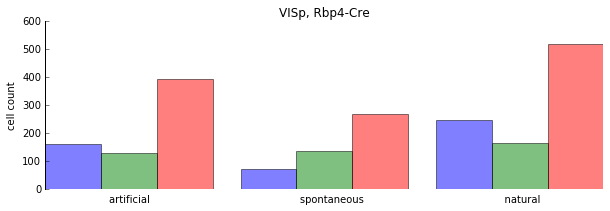

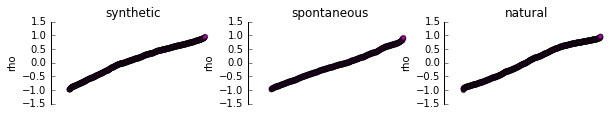

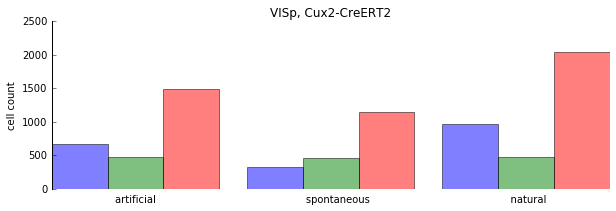

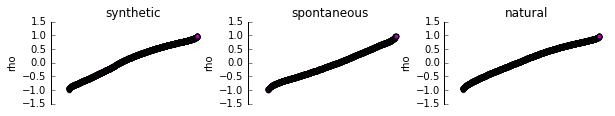

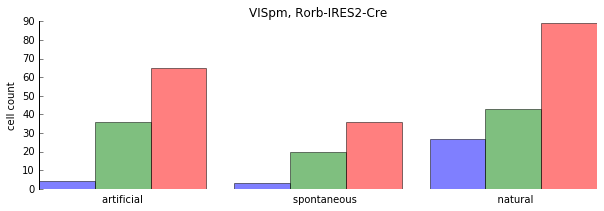

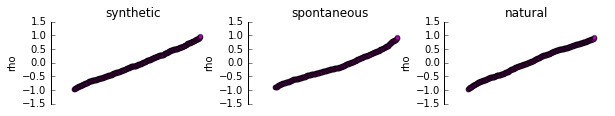

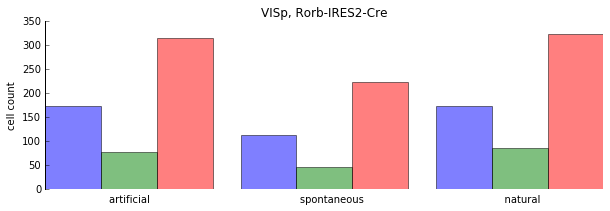

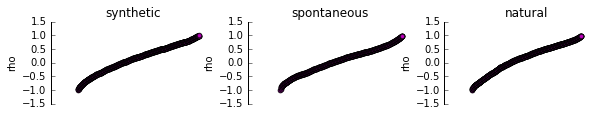

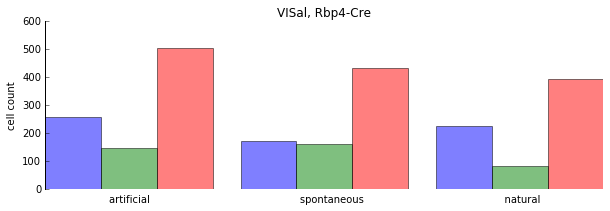

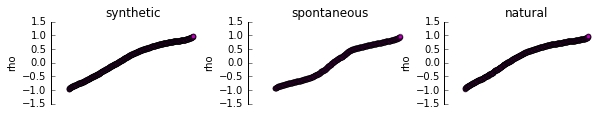

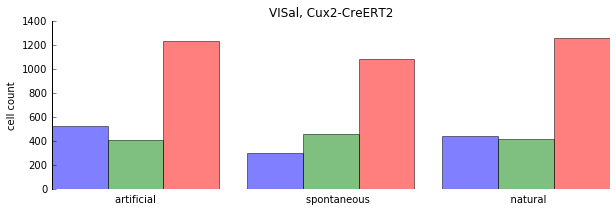

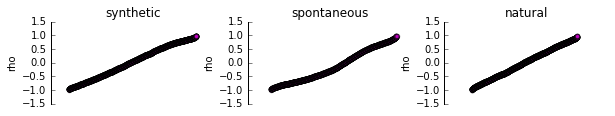

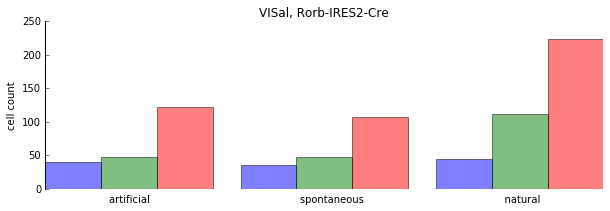

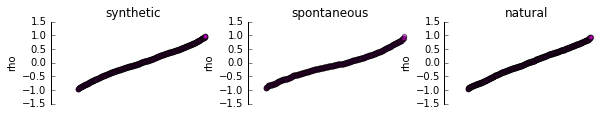

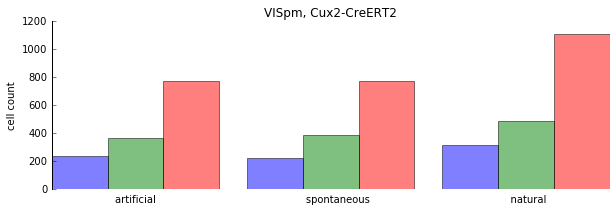

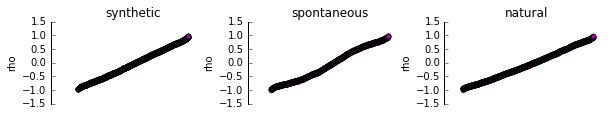

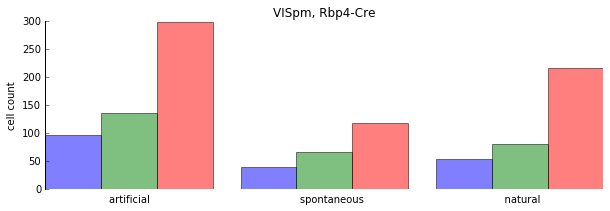

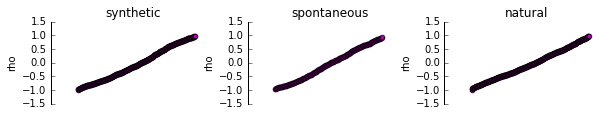

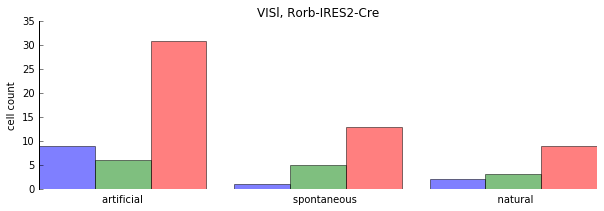

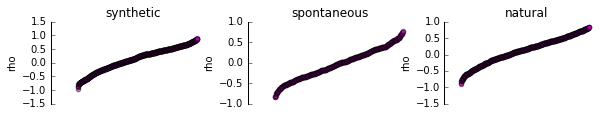

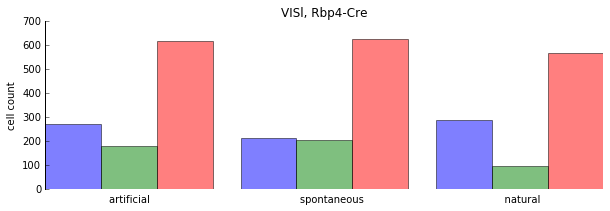

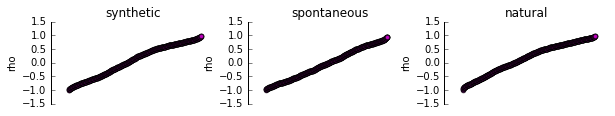

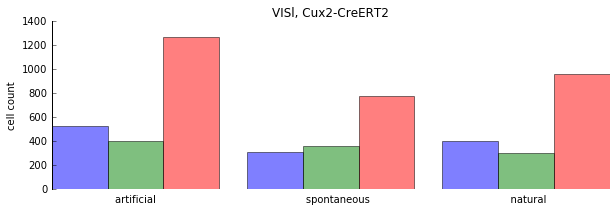

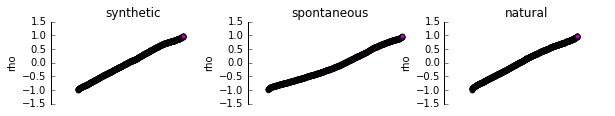

In [721]:
import sys

for (loc, cre) in all_results.keys():

    rs_results = all_results[(loc, cre)]
    
    r_banda = {stim: 0 for stim in grouped_names}
    r_inca = {stim: 0 for stim in grouped_names}
    r_deca = {stim: 0 for stim in grouped_names}


    r_hist = {stim: [] for stim in grouped_names}


    for ds in rs_results.keys():
        stim_results = rs_results[ds]  
        for stimulus in stim_results.keys():

            _, results = stim_results[stimulus]

            for k in results.keys():
                rho, p, p_var = results[k]

                r_hist[stimulus].append(rho)

                if p_var < 0.01:
                    r_banda[stimulus] += 1


                    if rho < 0 and p < 0.01:
                        r_deca[stimulus] += 1

                    elif rho > 0 and p < 0.01:
                        r_inca[stimulus] += 1



    plt.figure(figsize = [10, 3])
    for i, stimulus in enumerate(grouped_names):

        ax = plt.subplot(111)
        num_cells = sum([r_inca[stimulus], r_deca[stimulus], r_banda[stimulus]])

        plt.bar(i*.35, r_inca[stimulus] , .1,  label =  'high pass', color = 'b', alpha = .5)
        plt.bar(i*.35 + .1, r_deca[stimulus] , .1, label = 'low pass', color= 'g', alpha = .5)
        plt.bar(i*.35 + .2, r_banda[stimulus], .1, label= 'modulated', color='r', alpha = .5)
    
    plt.ylabel('cell count') 
    plt.xlabel('artificial                                                spontaneous                                             natural', fontsize = 10)
    plt.title(loc + ', ' + cre)   
    simpleaxis(ax)
    plt.show()


    plt.figure(figsize = [10, 5])
    for i, stimulus in enumerate(grouped_names):

        ax = plt.subplot(3, 3, i+1)
        rs = np.array(r_hist[stimulus])

        idx = np.argsort(rs)
        plt.scatter(range(len(rs[idx])), rs[idx], alpha = .5, c='m')

        plt.title(stimulus)
        plt.ylabel('rho')
        simpleaxis(ax)


    plt.show()
    
    

synthetic


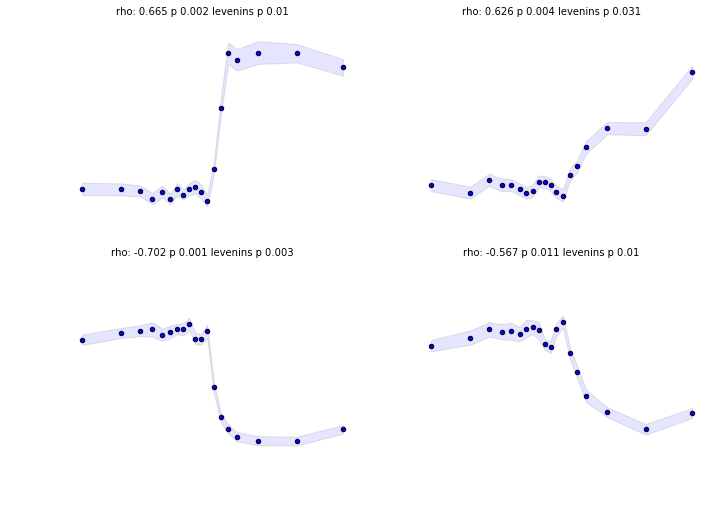

spontaneous


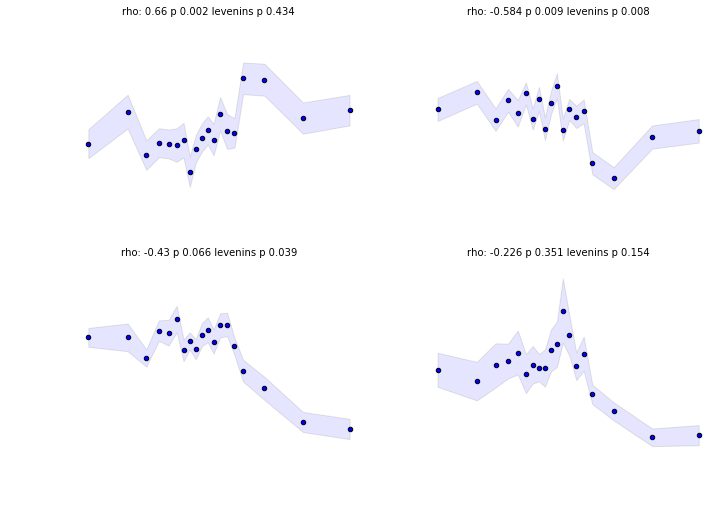

natural


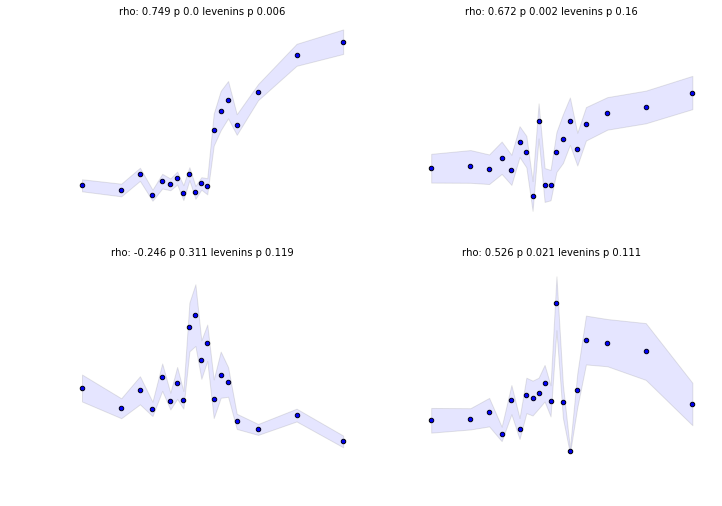

synthetic


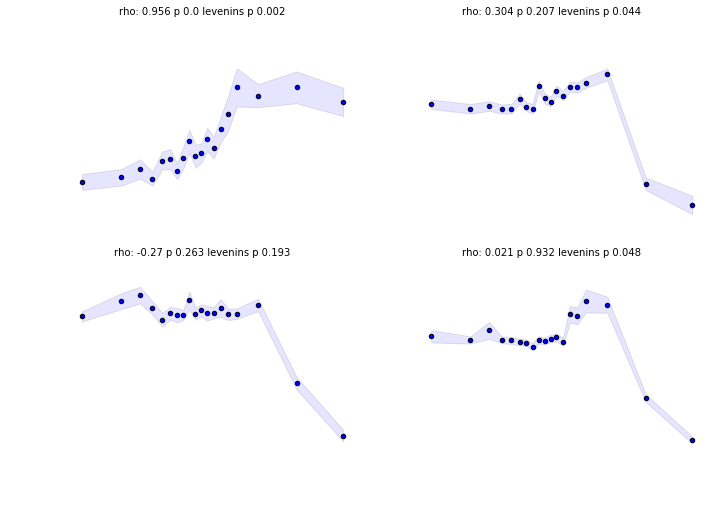

spontaneous


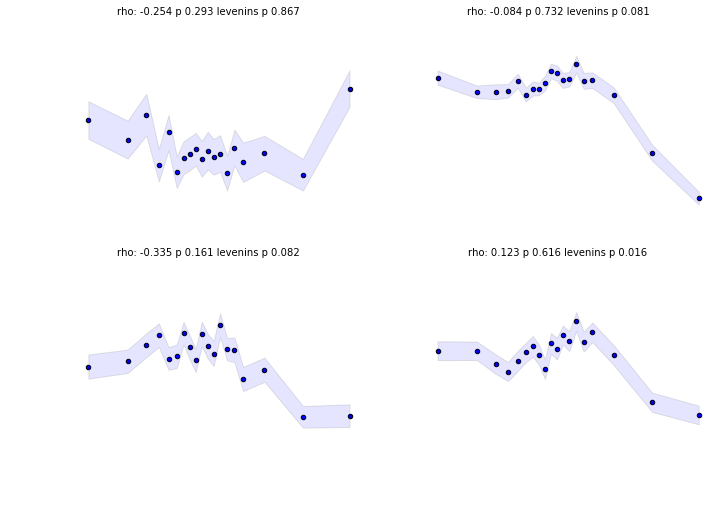

natural


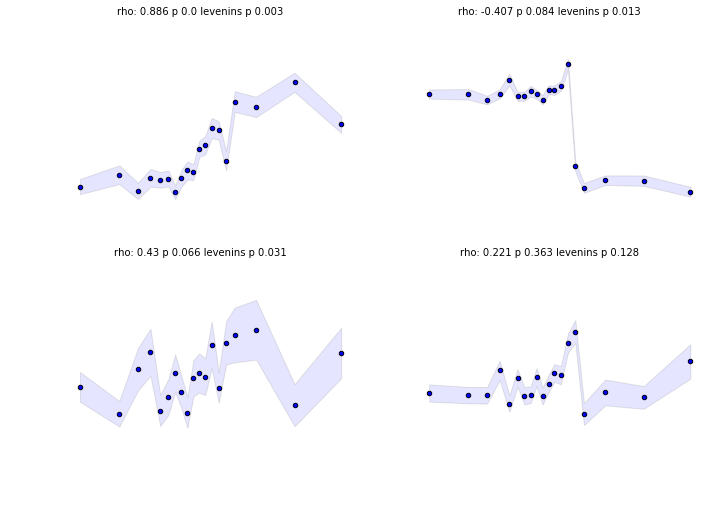

synthetic


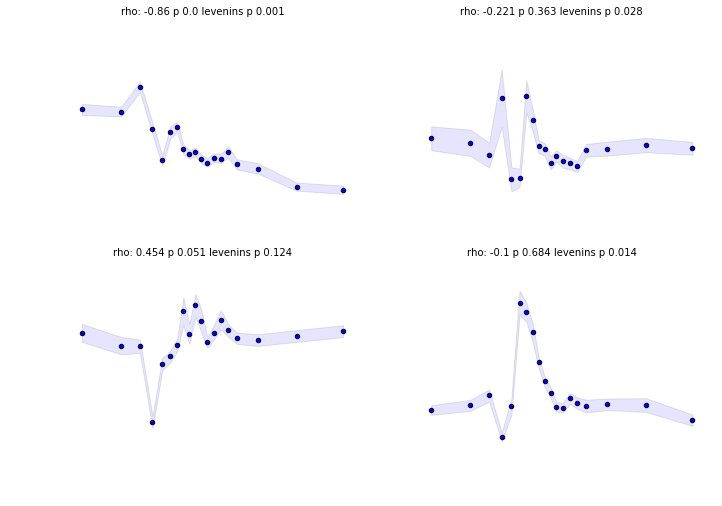

spontaneous


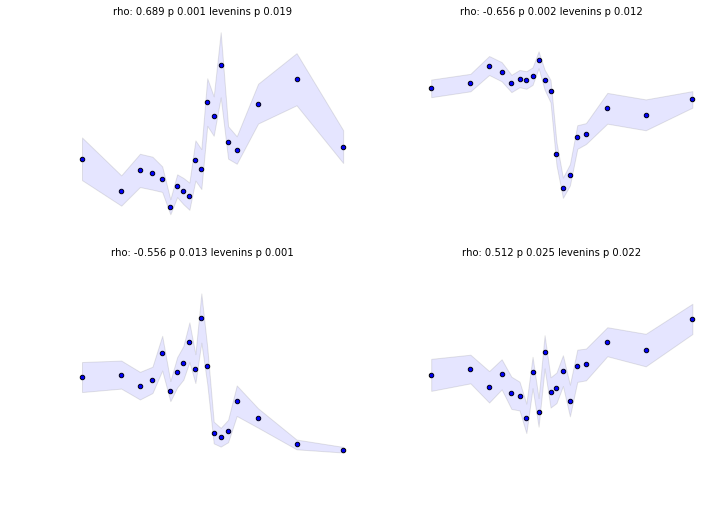

natural


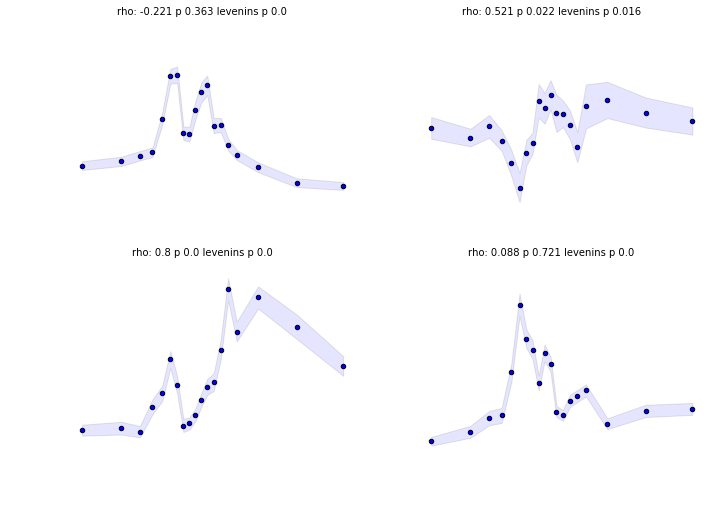

synthetic


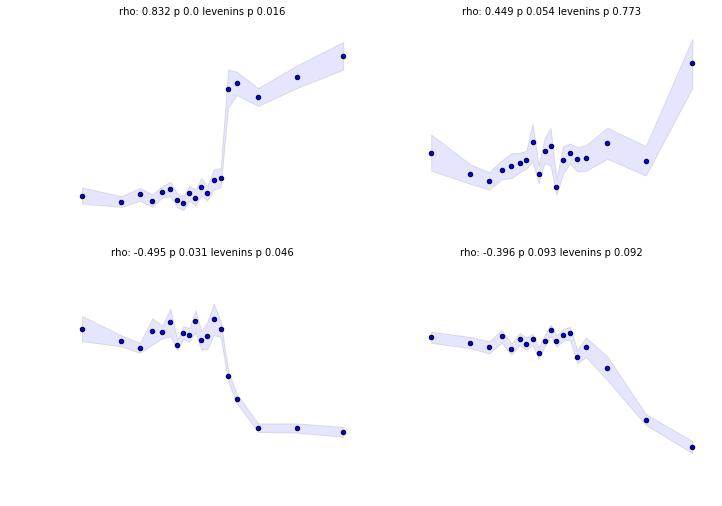

spontaneous


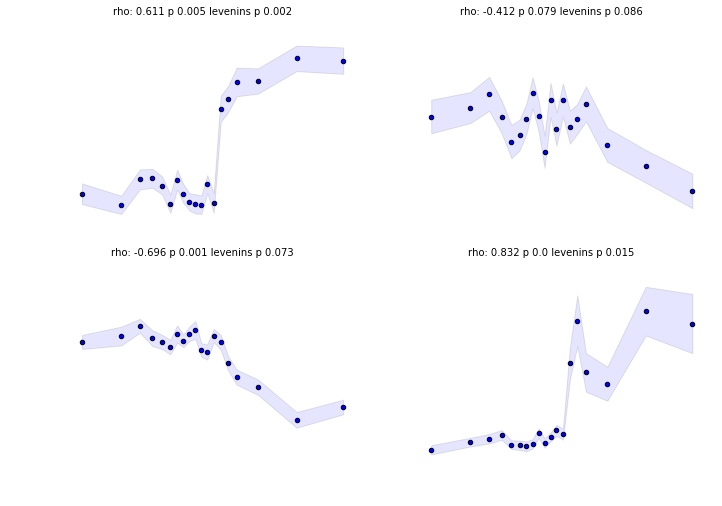

natural


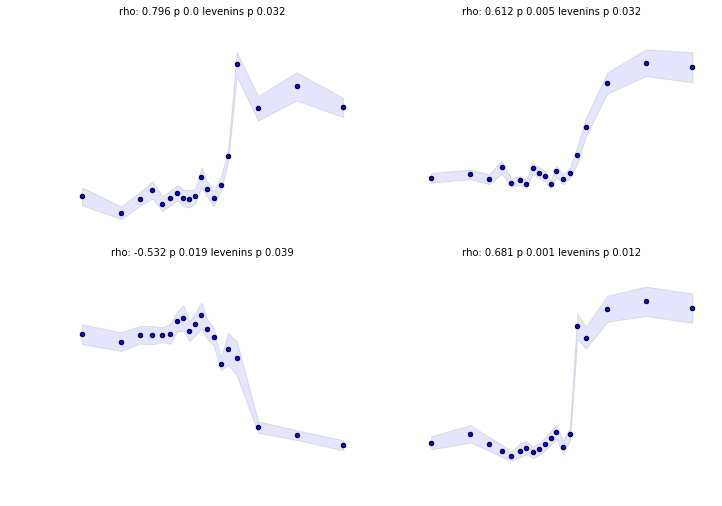

synthetic


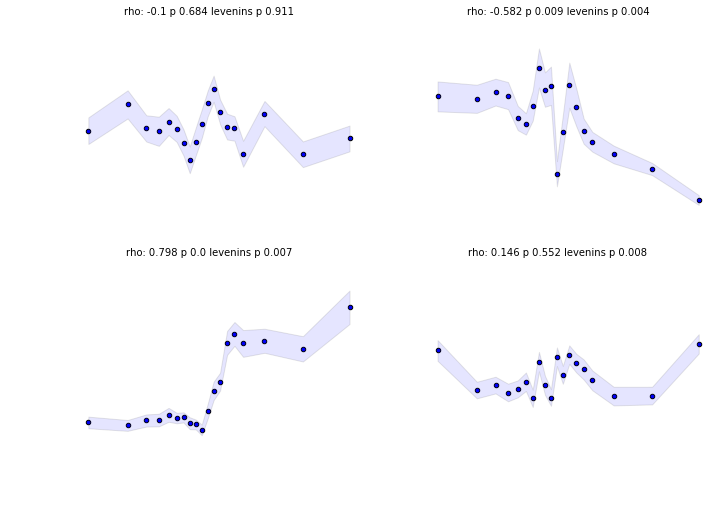

spontaneous


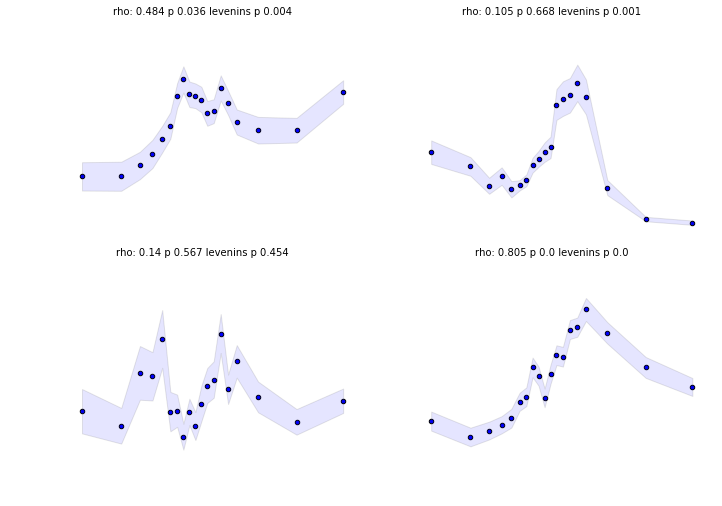

natural


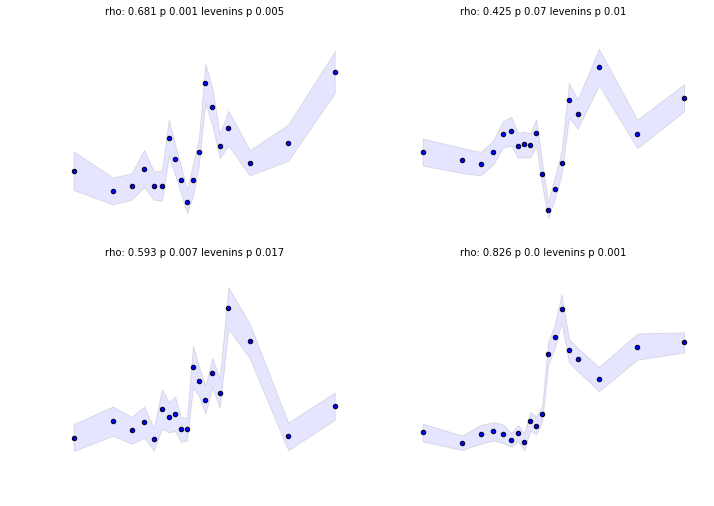

synthetic


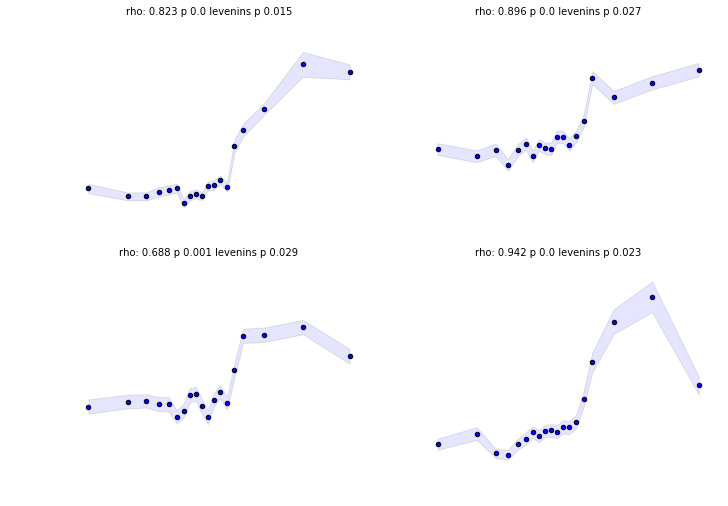

spontaneous


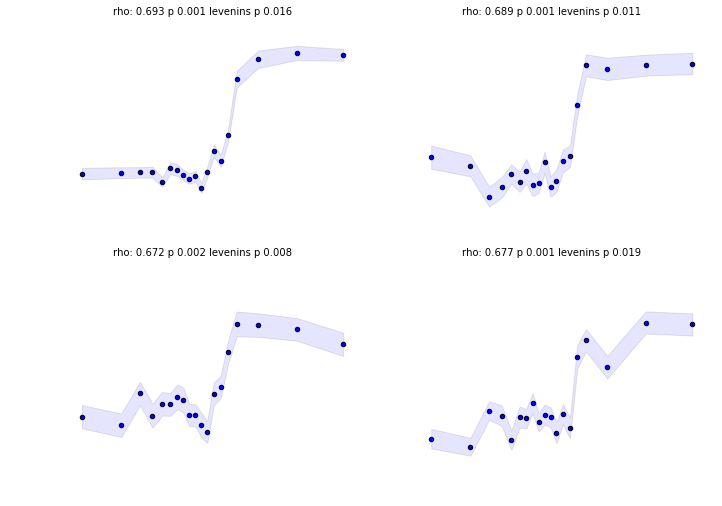

natural


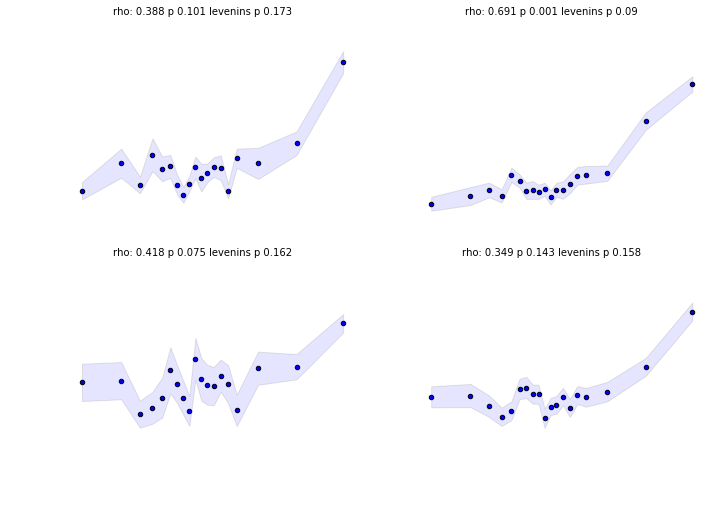

synthetic


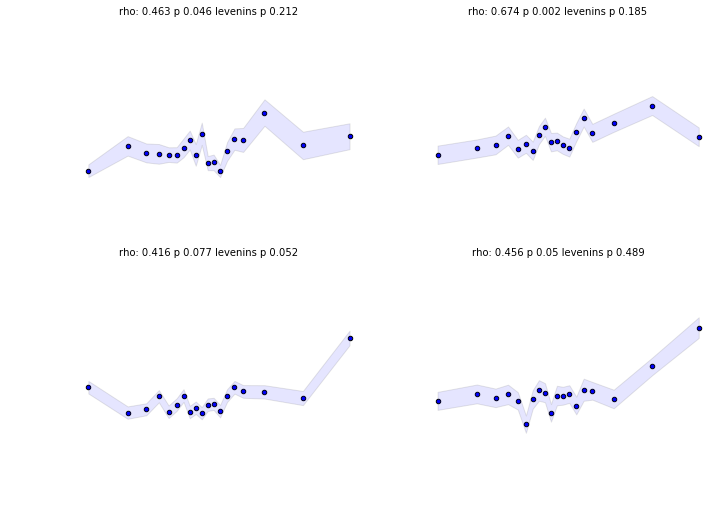

spontaneous


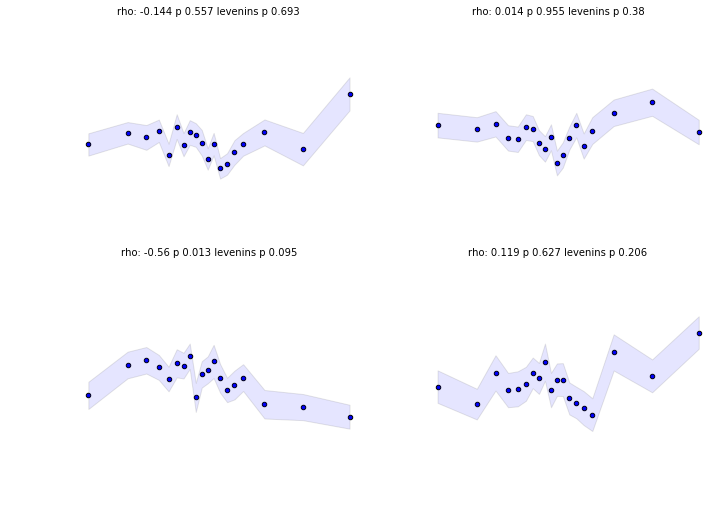

natural


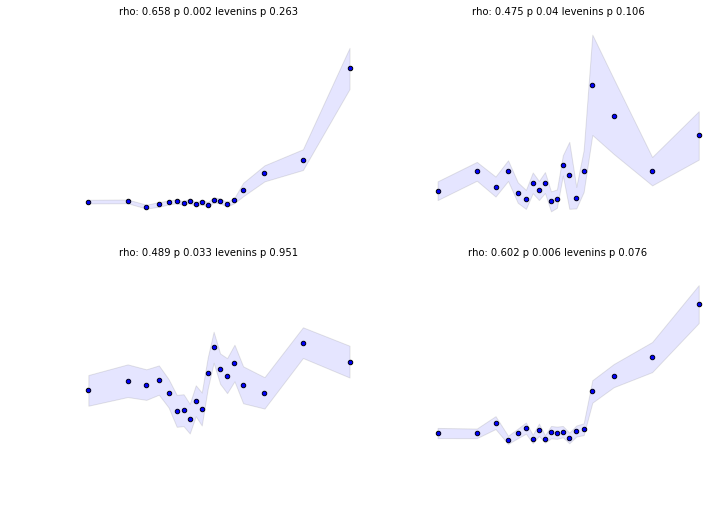

synthetic


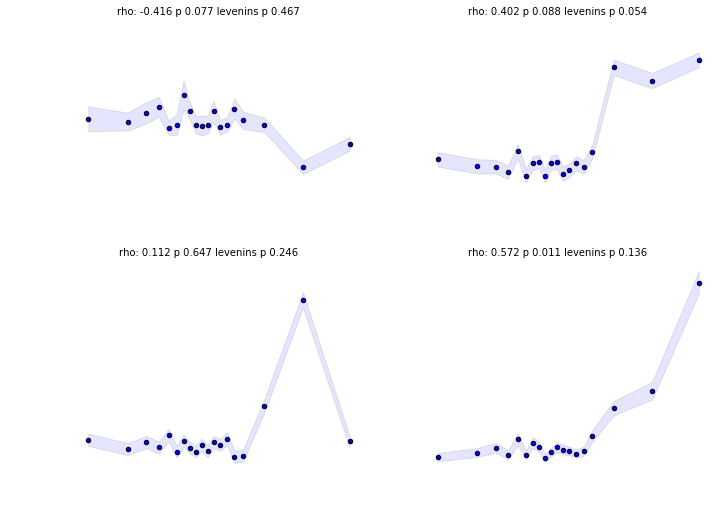

spontaneous


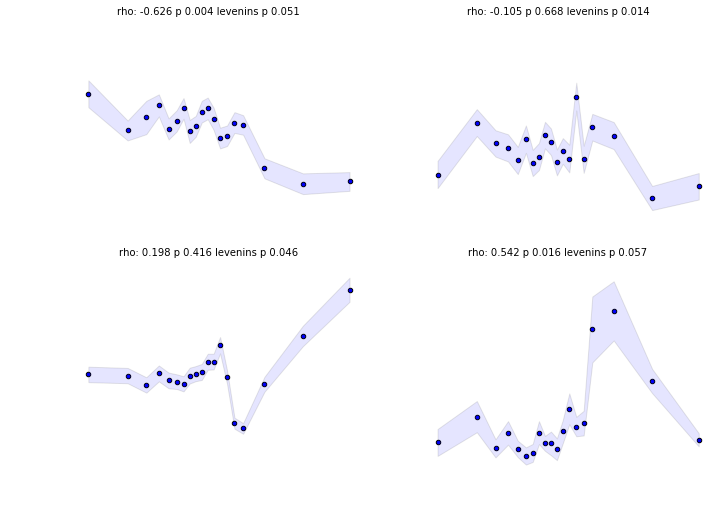

natural


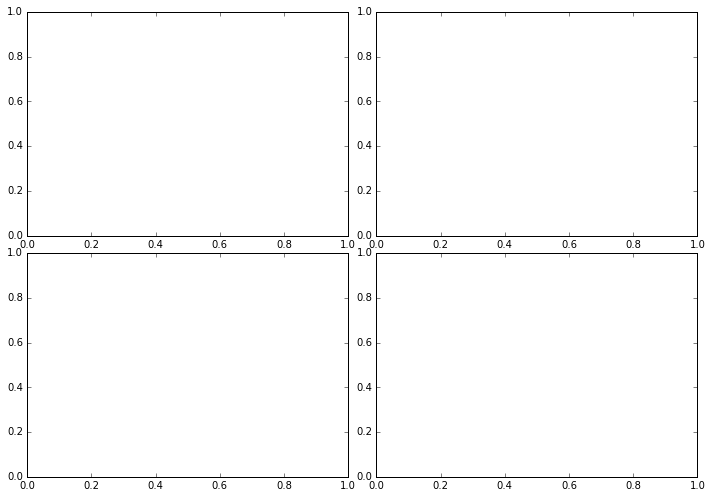

synthetic


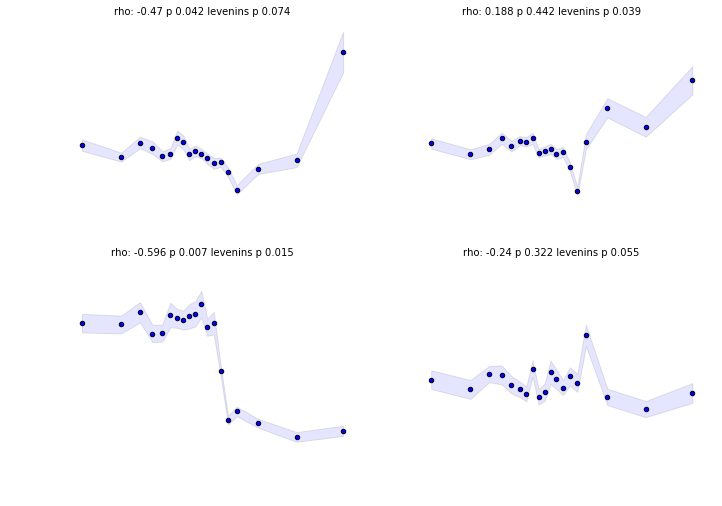

spontaneous


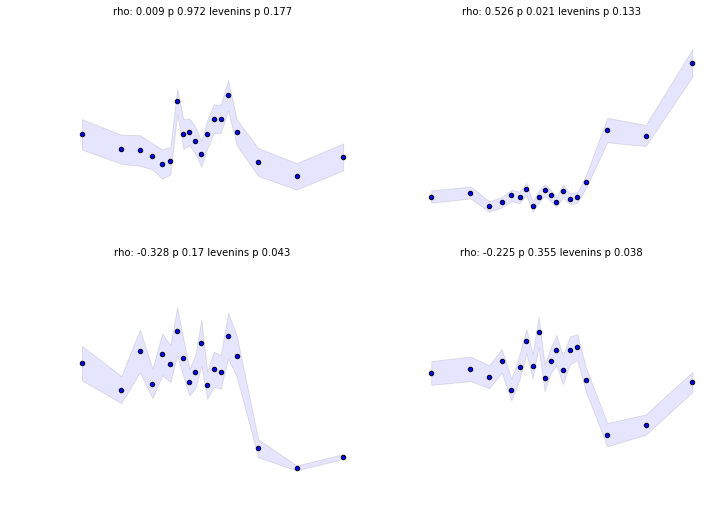

natural


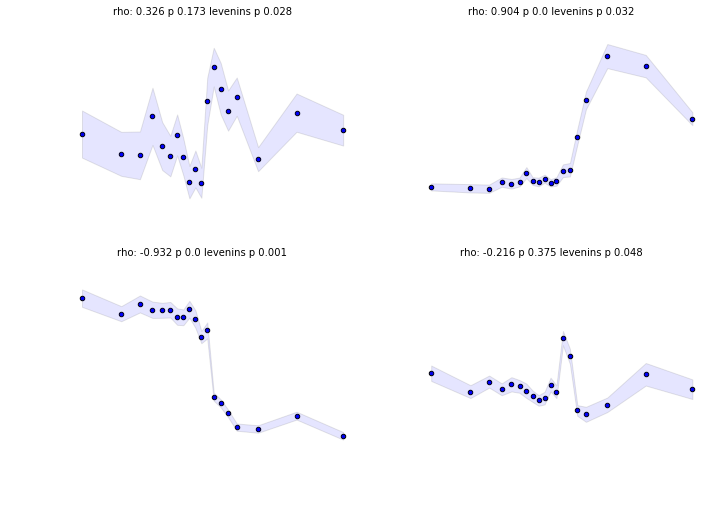

synthetic


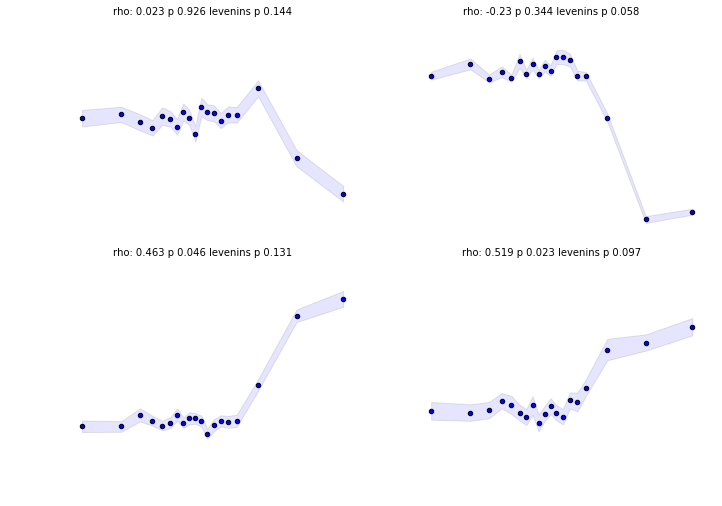

spontaneous


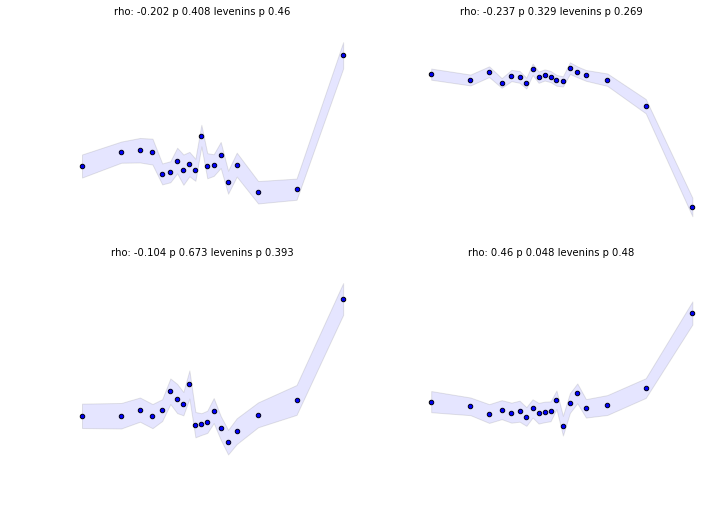

natural


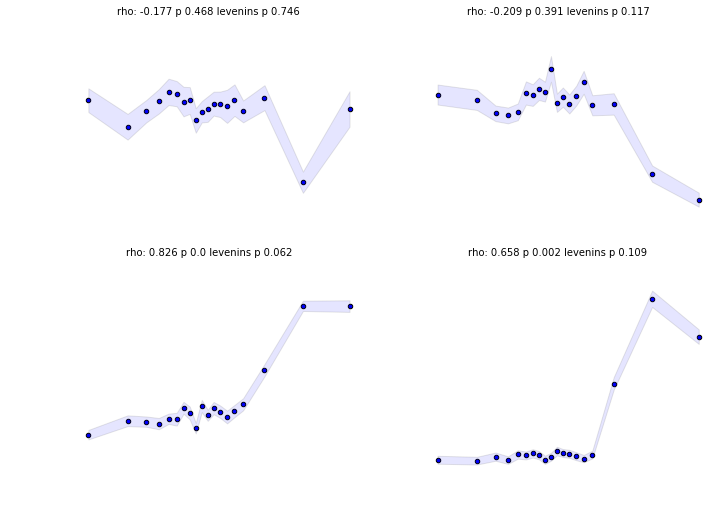

synthetic


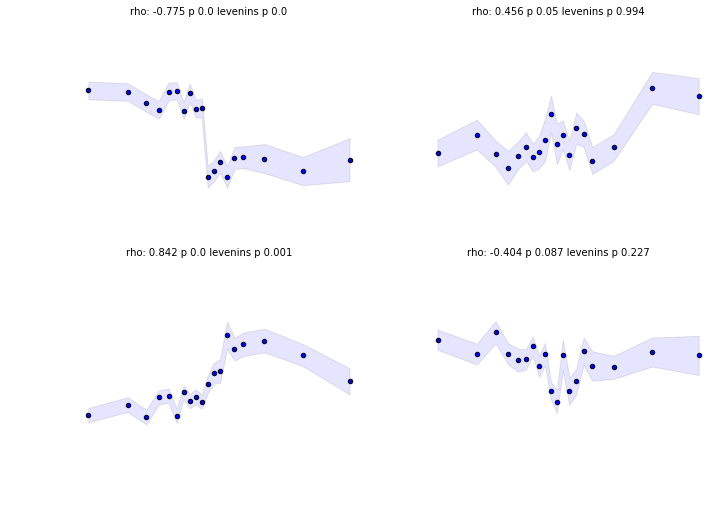

spontaneous


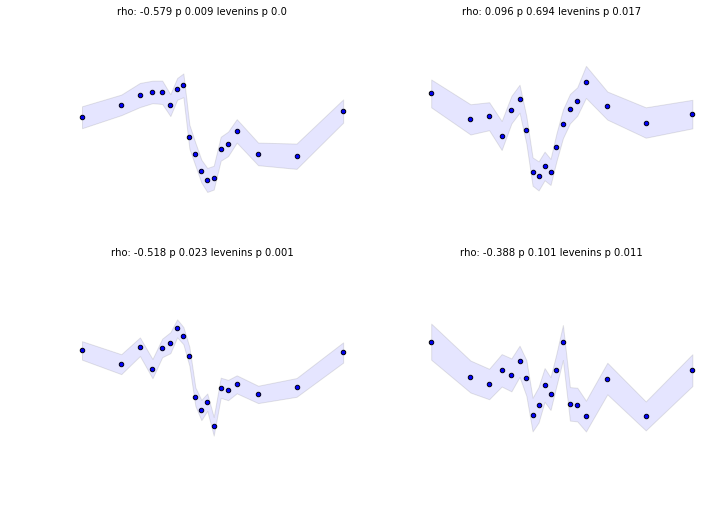

natural


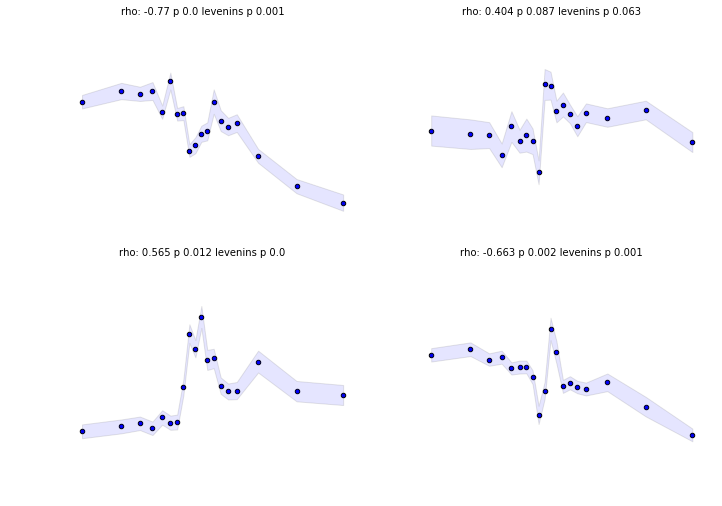

synthetic


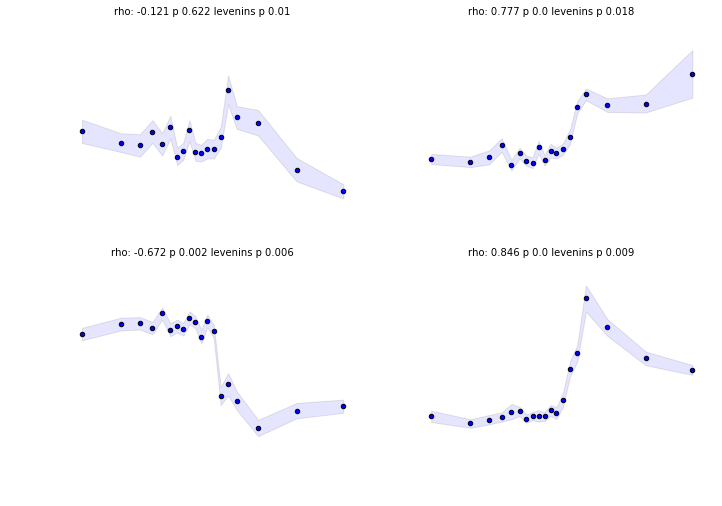

spontaneous


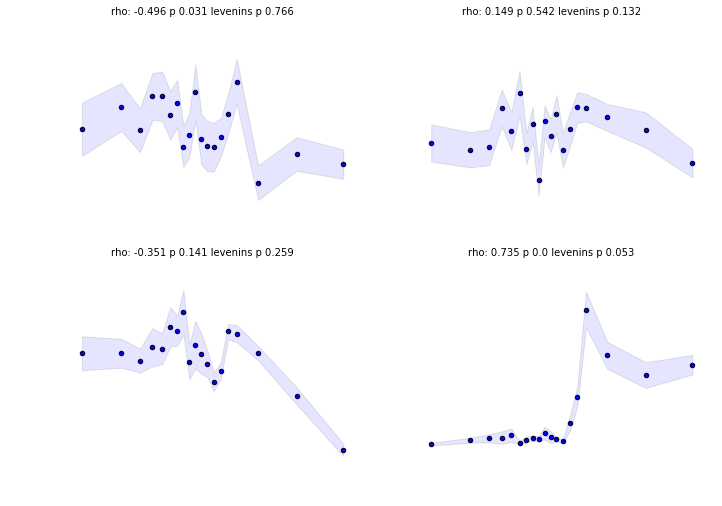

natural


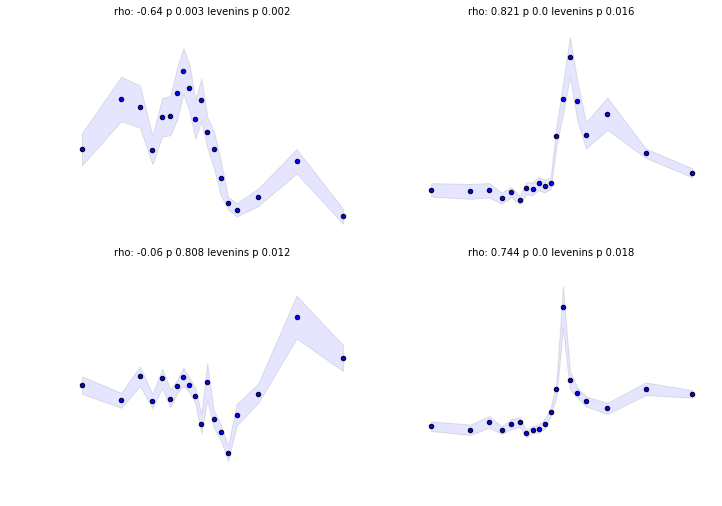

synthetic


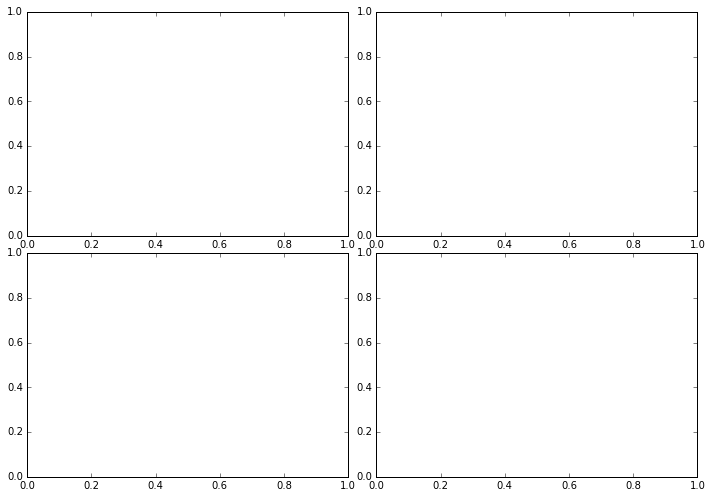

spontaneous


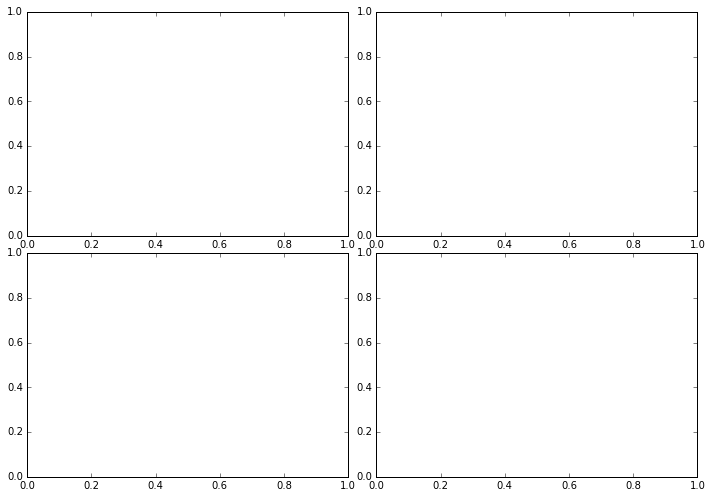

natural


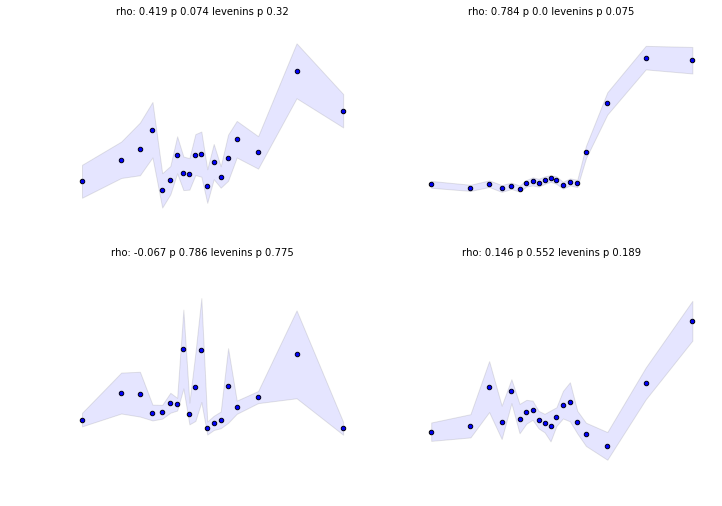

synthetic


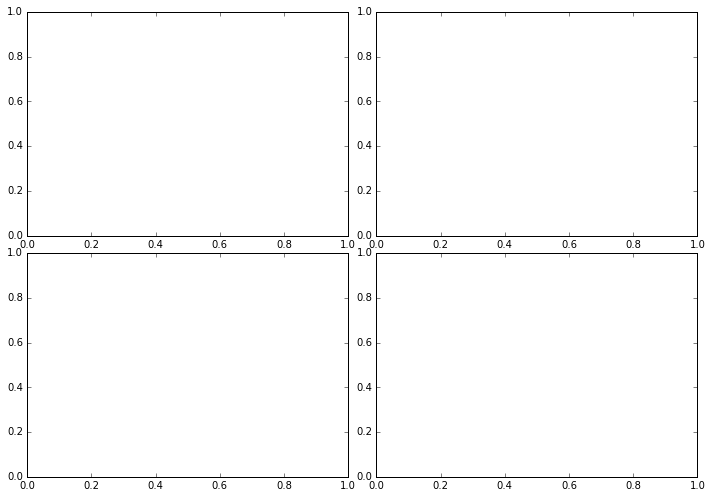

spontaneous


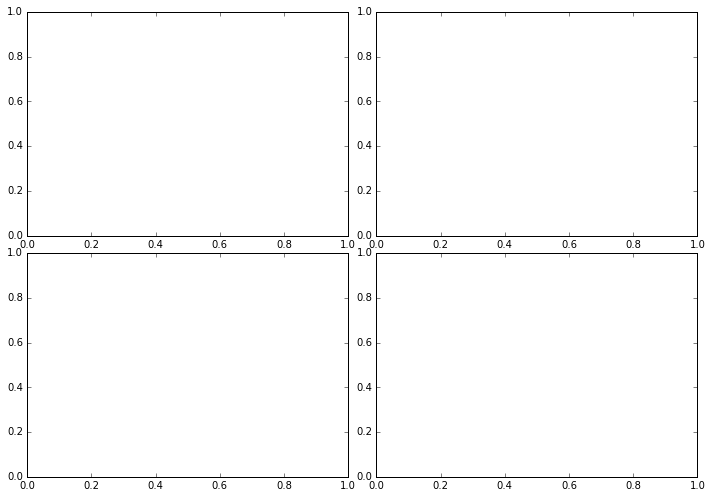

natural


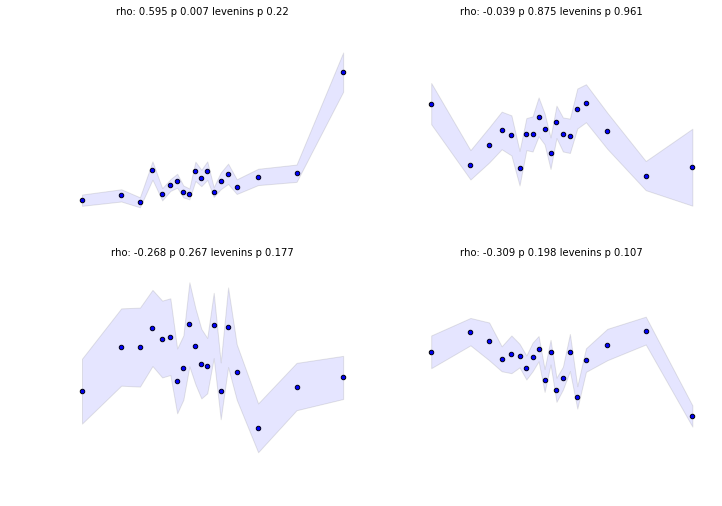

synthetic


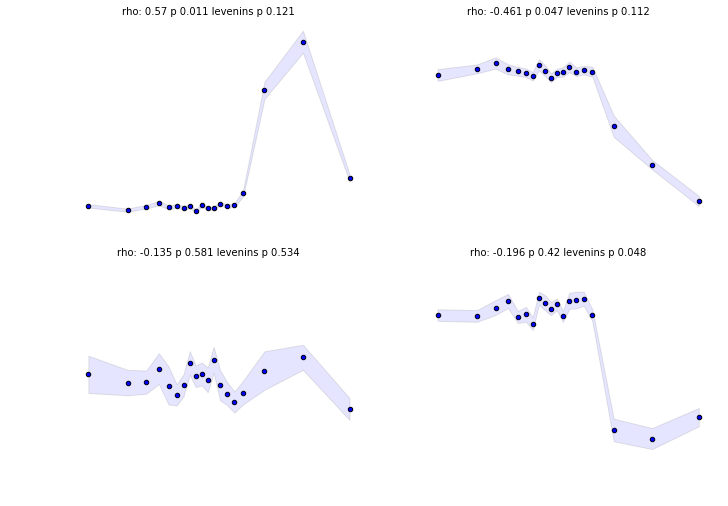

spontaneous


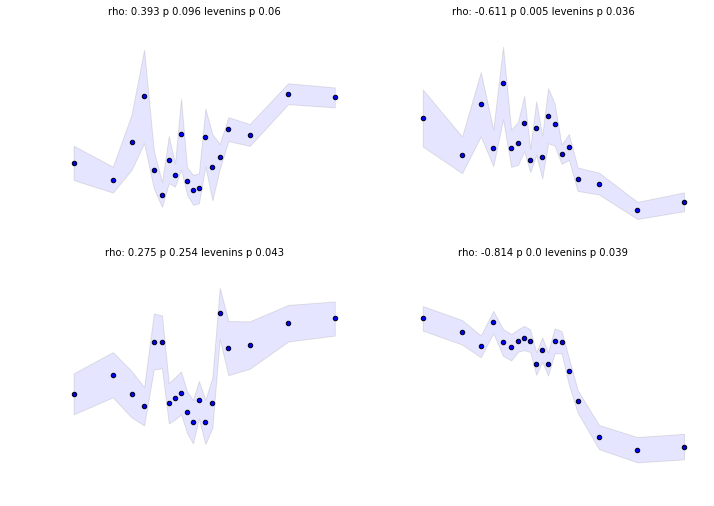

natural


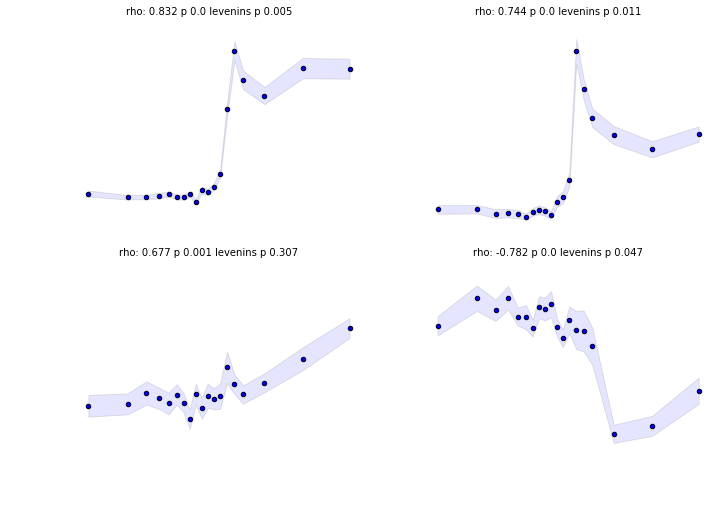

synthetic


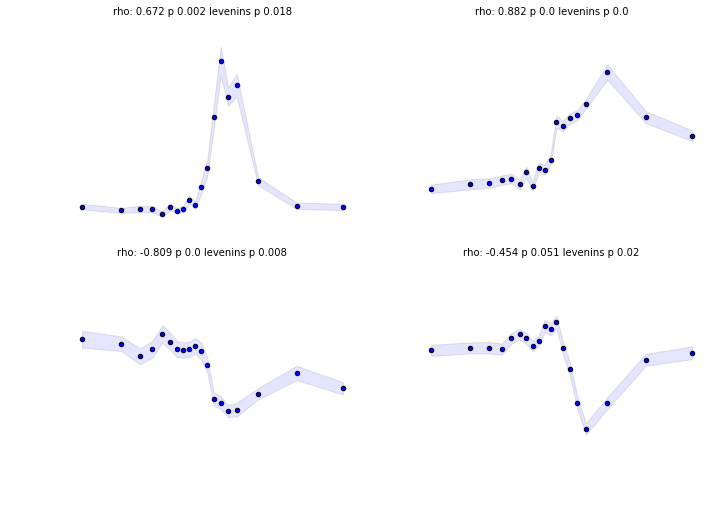

spontaneous


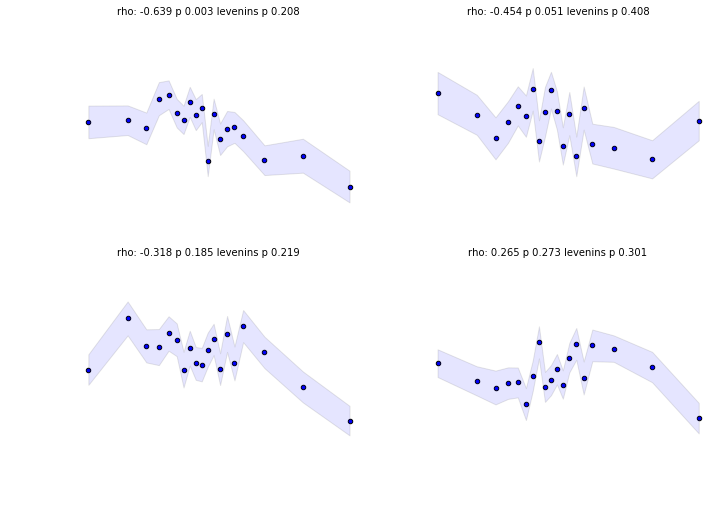

natural


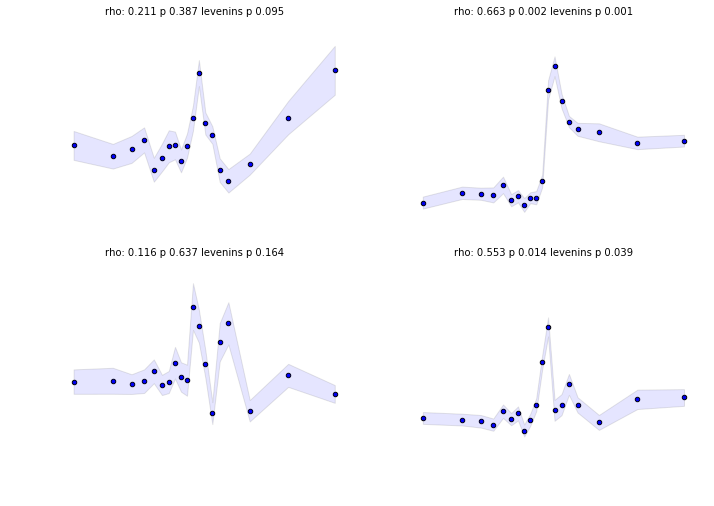

synthetic


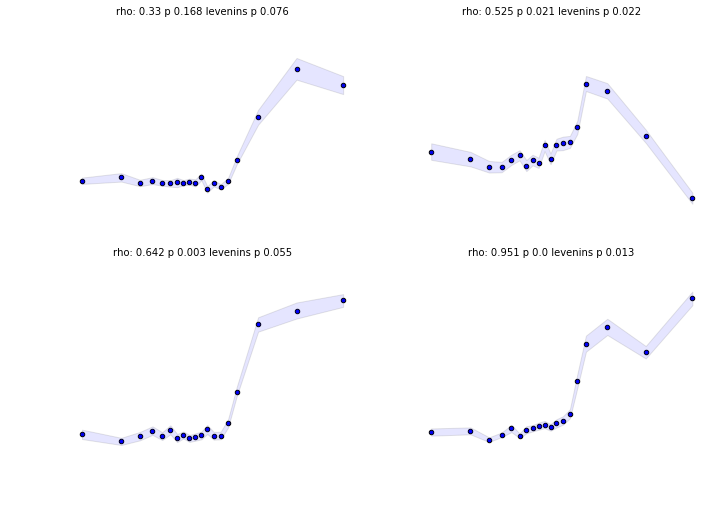

spontaneous


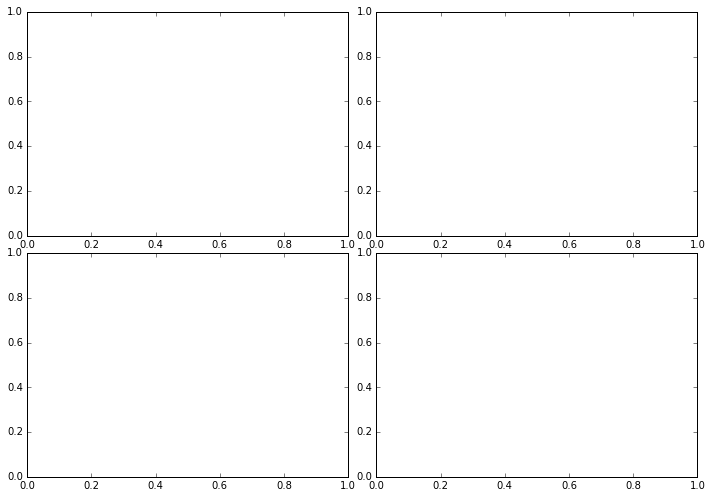

natural


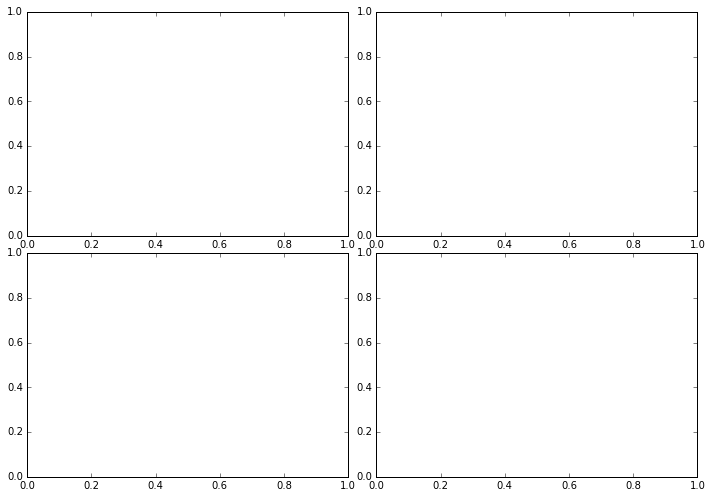

synthetic


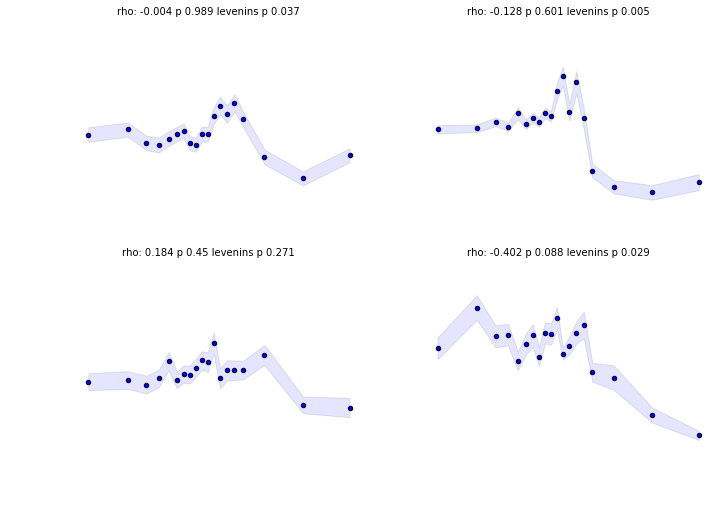

spontaneous


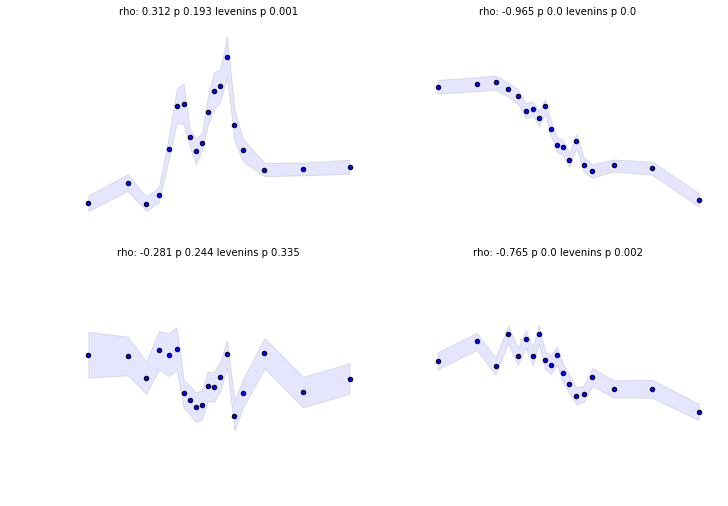

natural


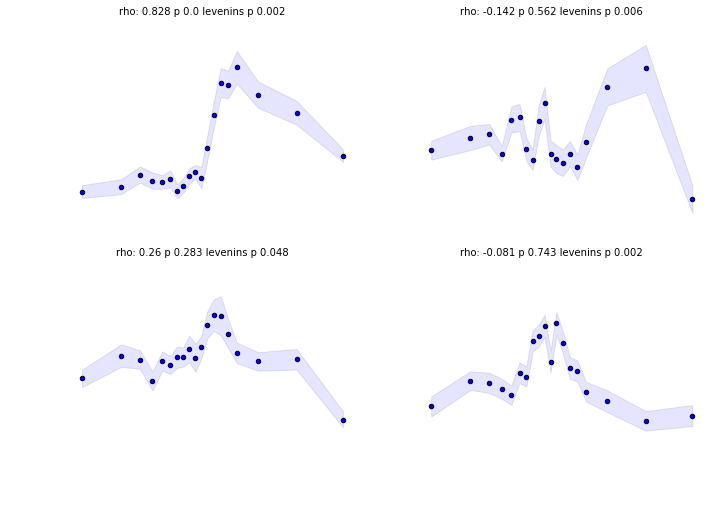

synthetic


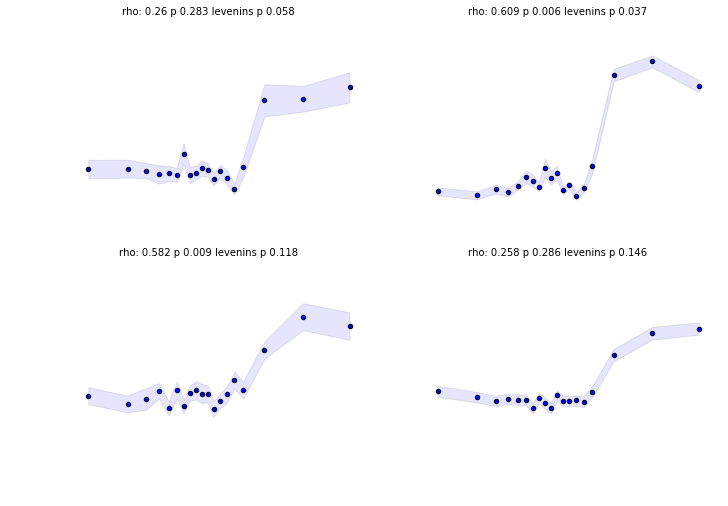

spontaneous


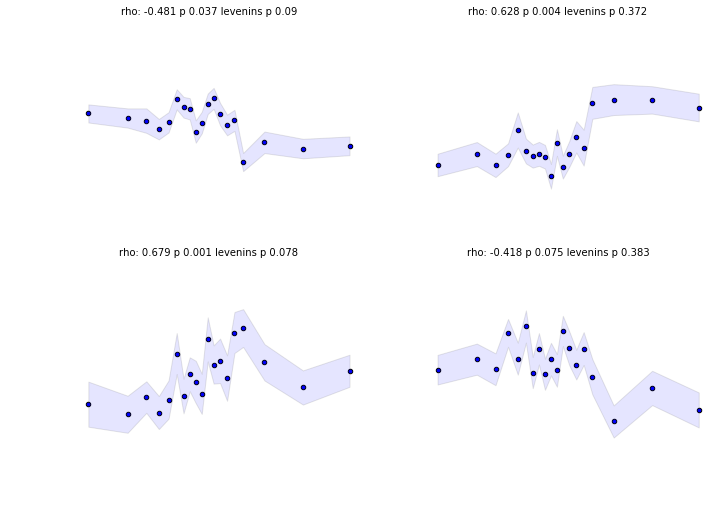

natural


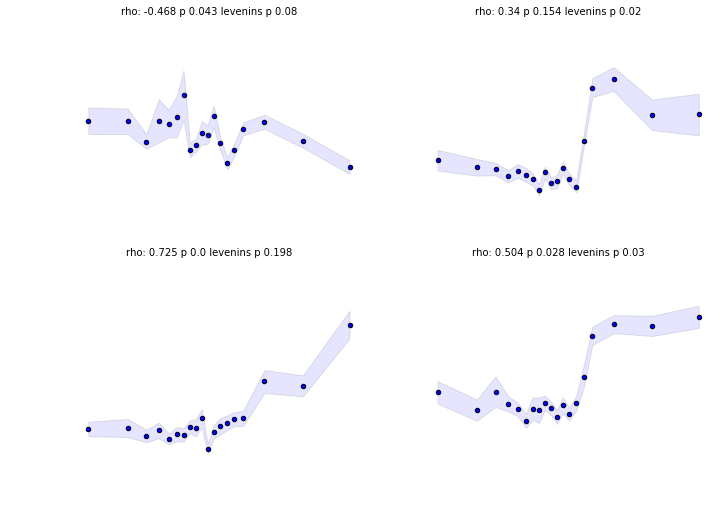

synthetic


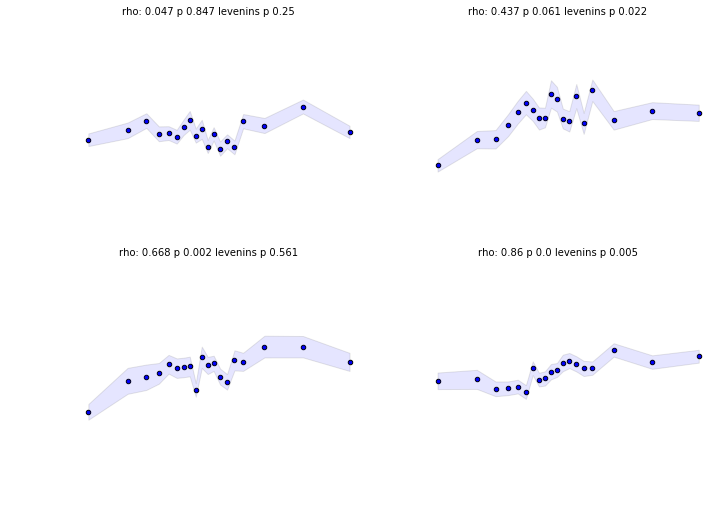

spontaneous


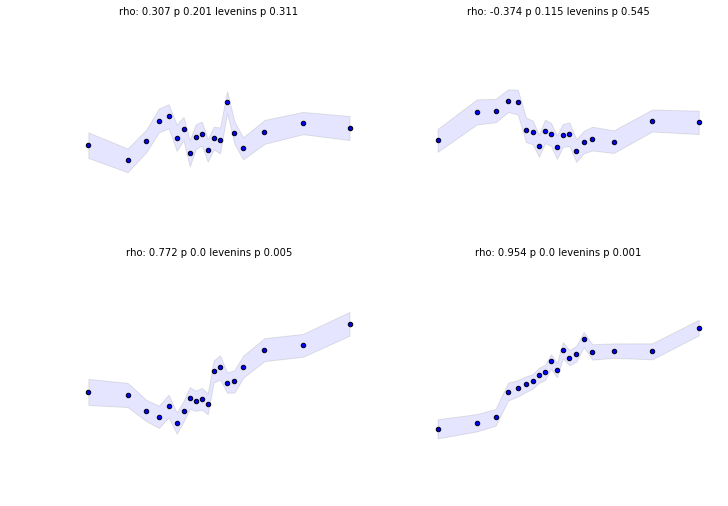

natural


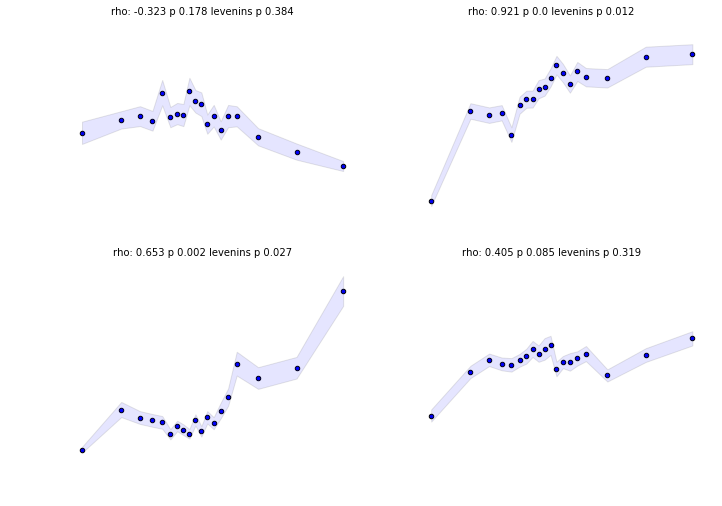

synthetic


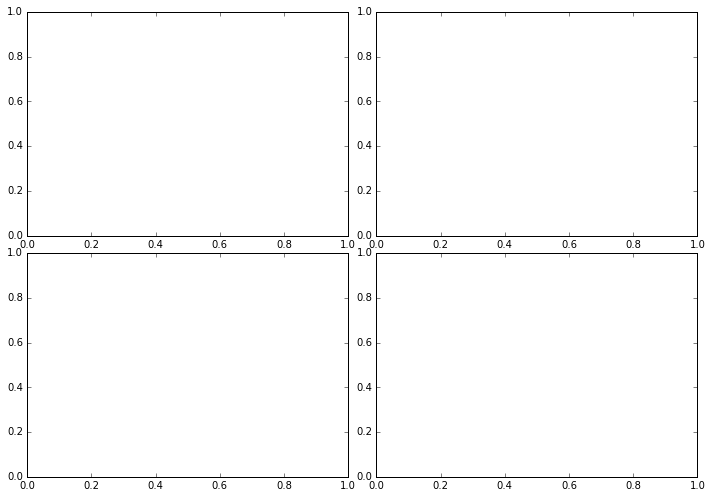

spontaneous


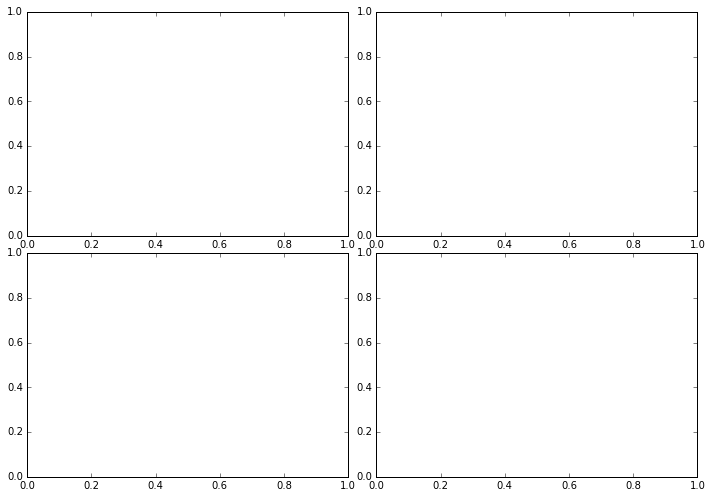

natural


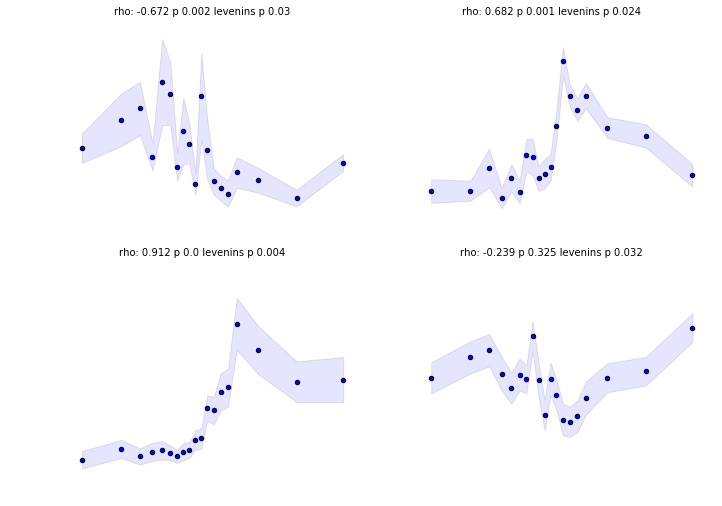

synthetic


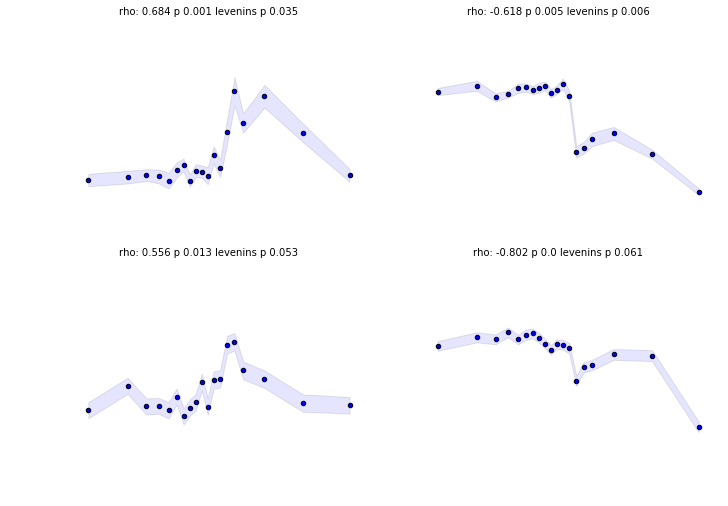

spontaneous


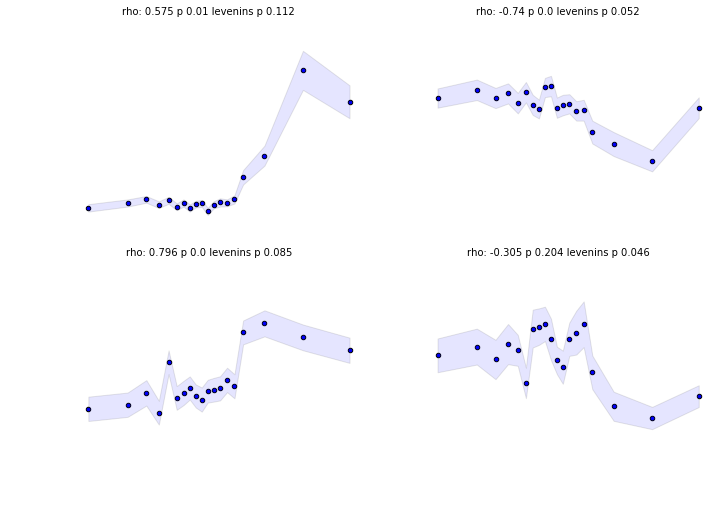

natural


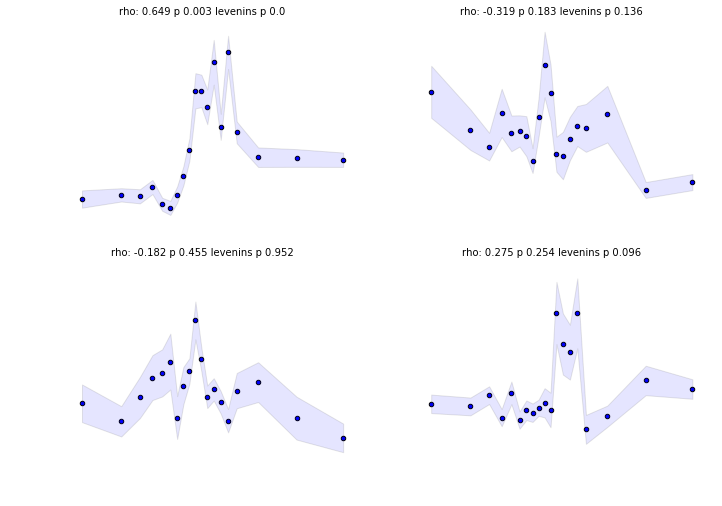

synthetic


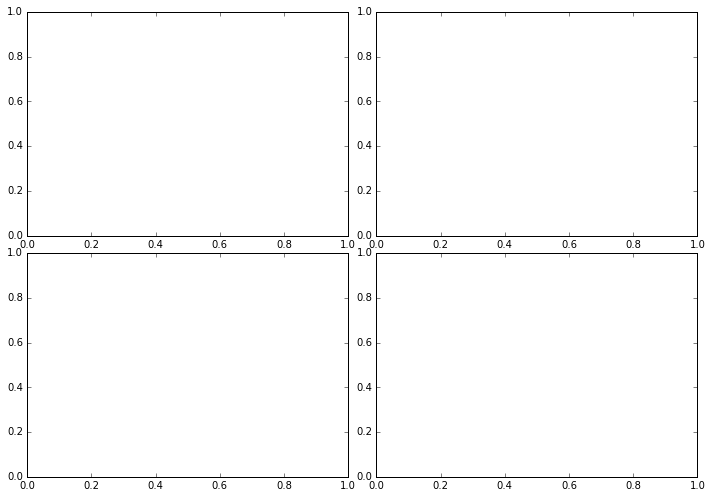

spontaneous


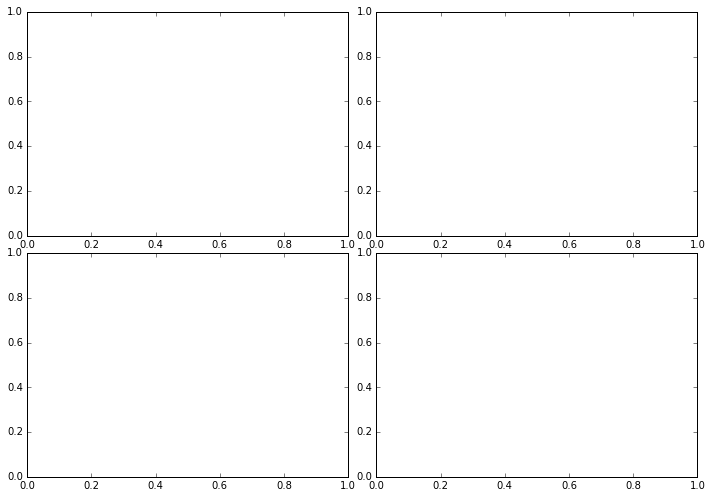

natural


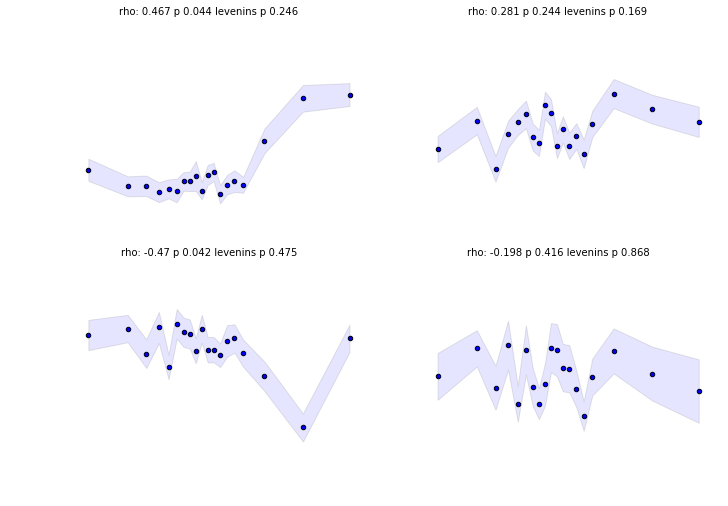

synthetic


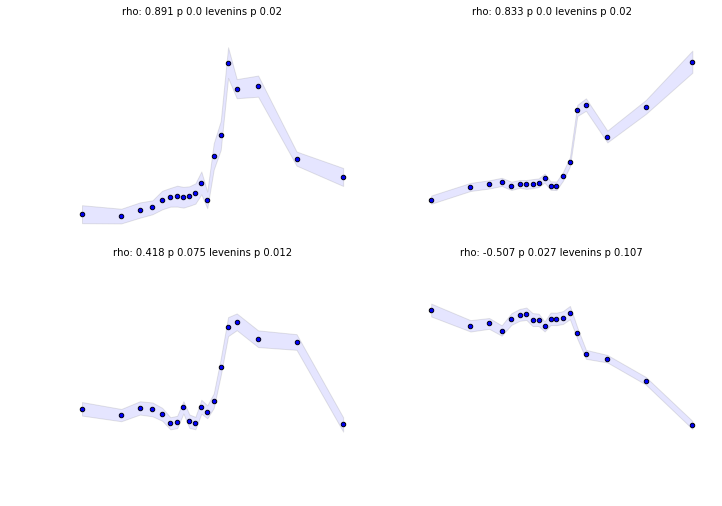

spontaneous


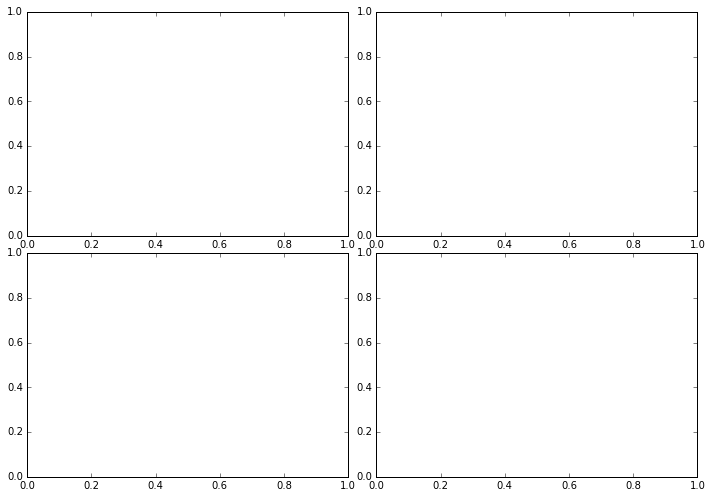

natural


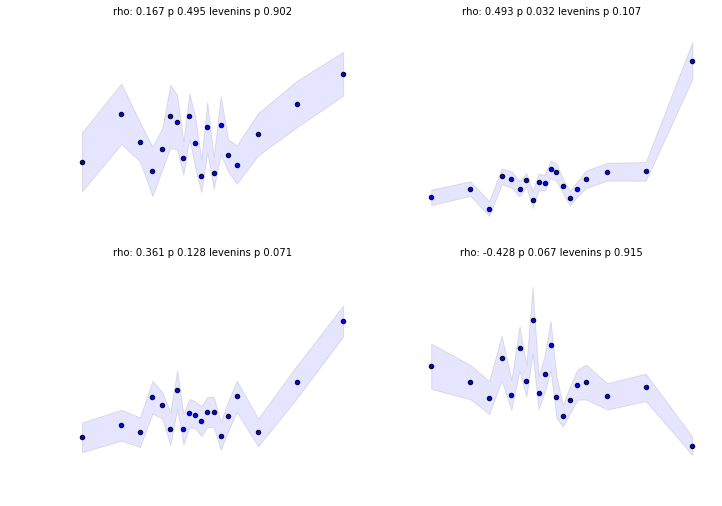

synthetic


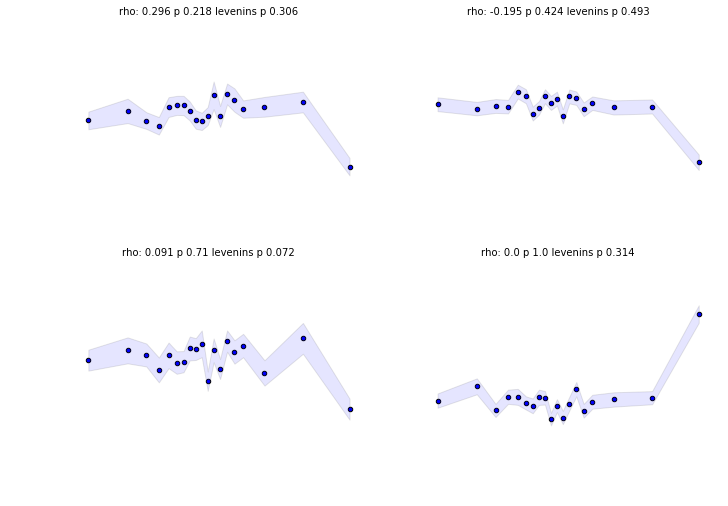

spontaneous


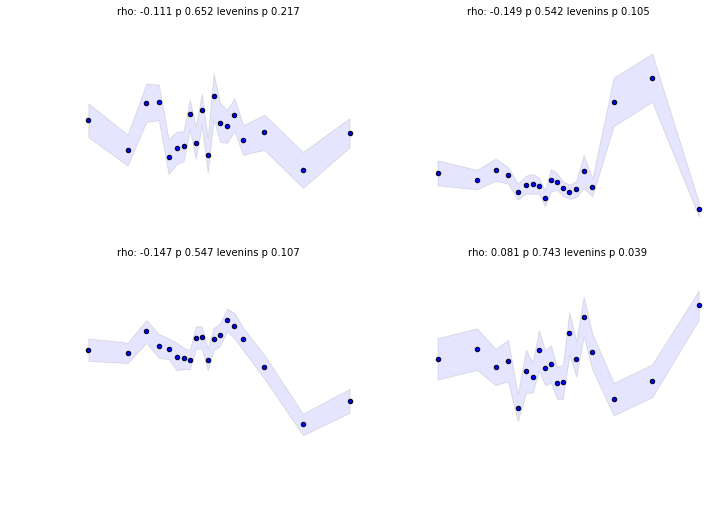

natural


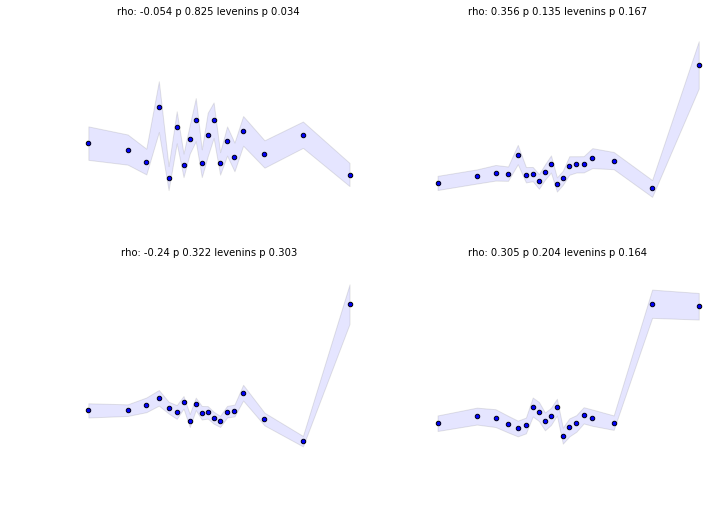

synthetic


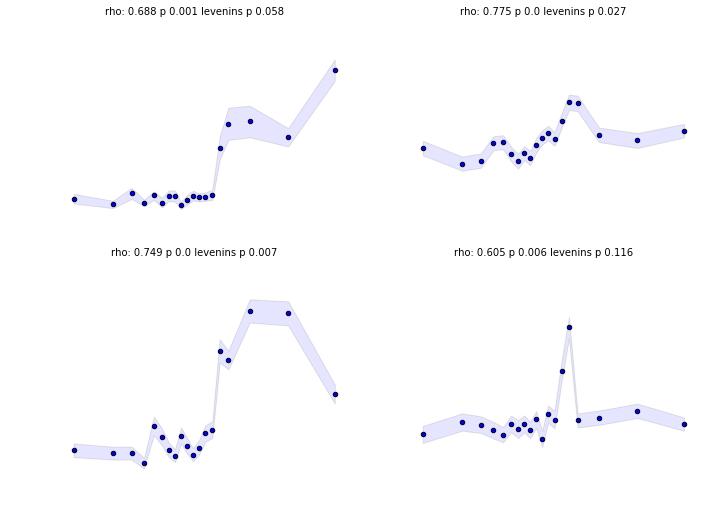

spontaneous


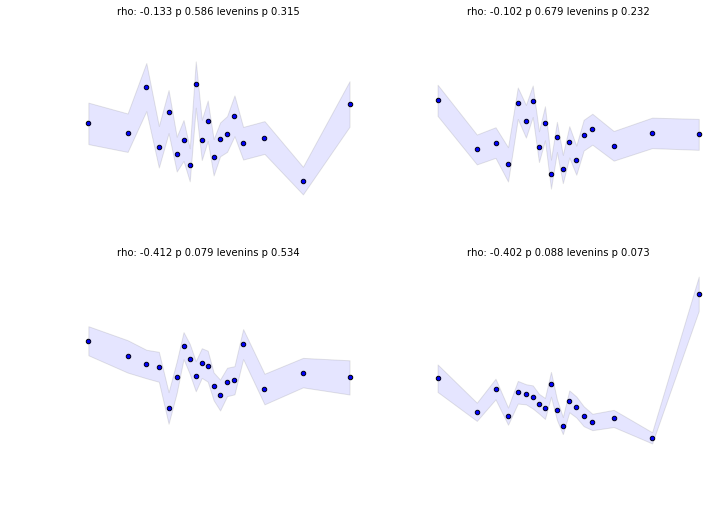

natural


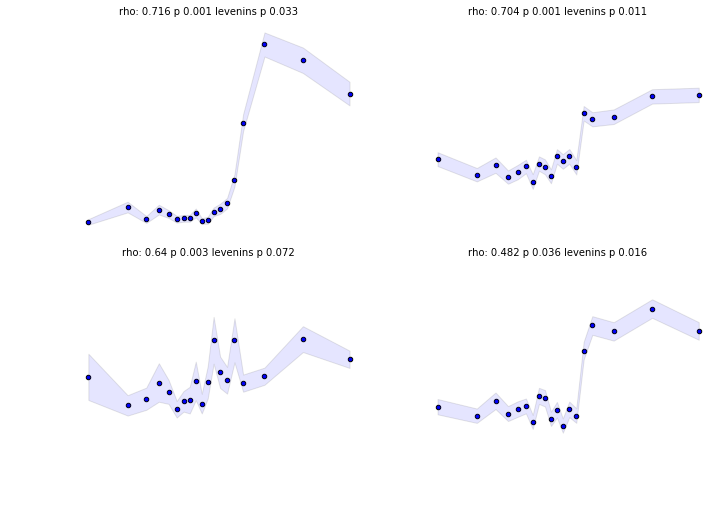

synthetic


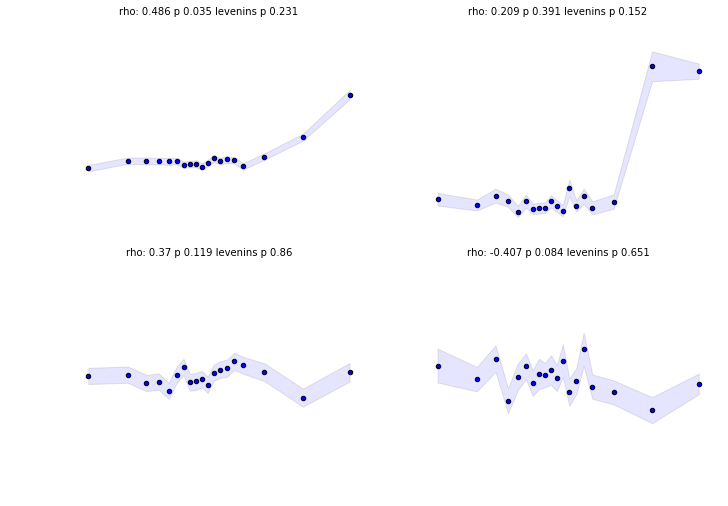

spontaneous


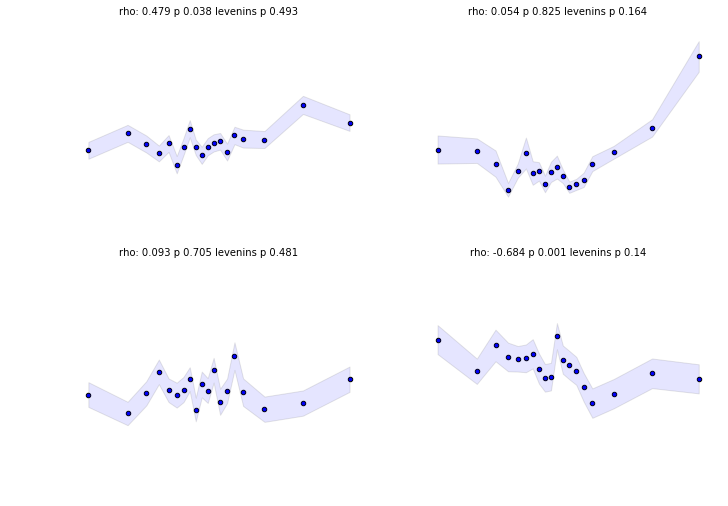

natural


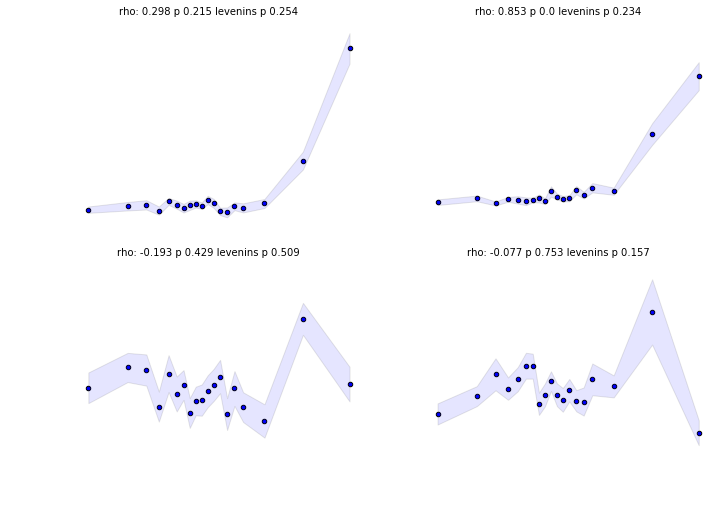

synthetic


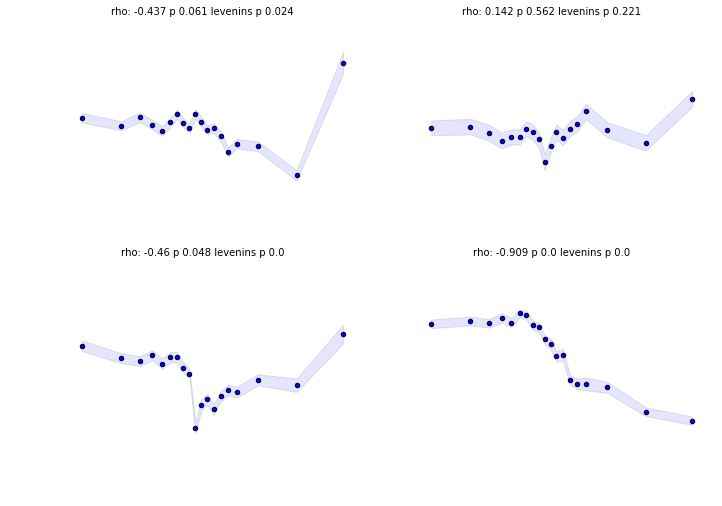

spontaneous


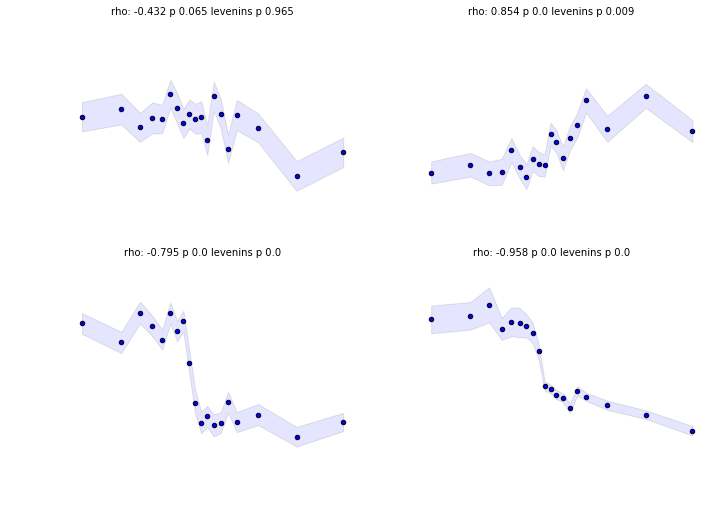

natural


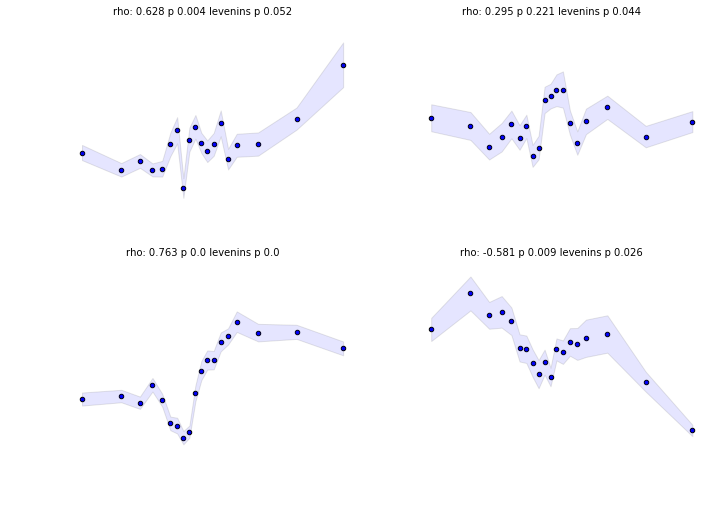

synthetic


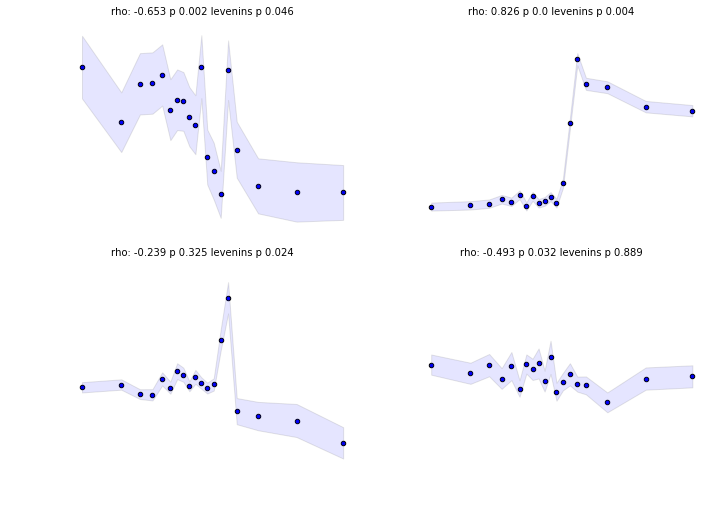

spontaneous


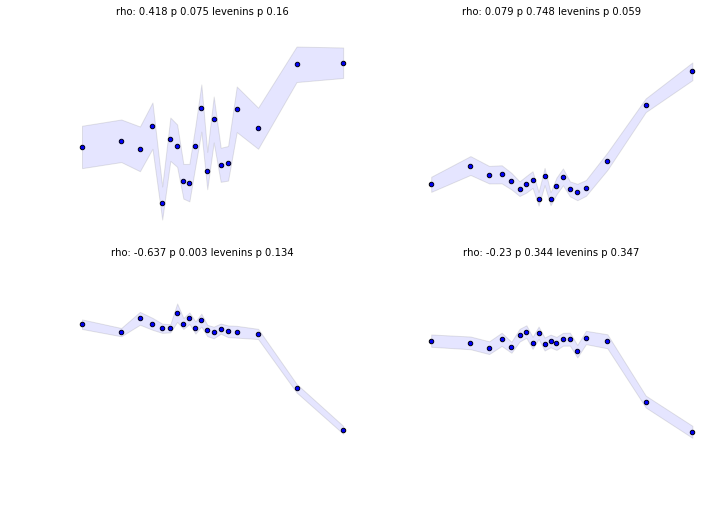

natural


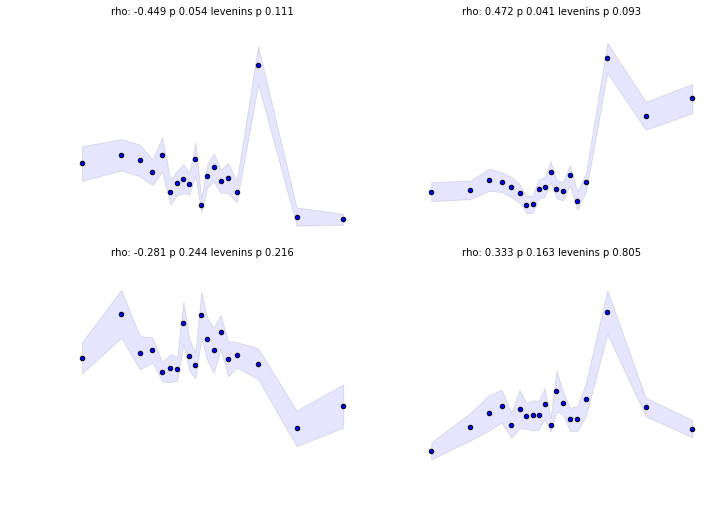

synthetic


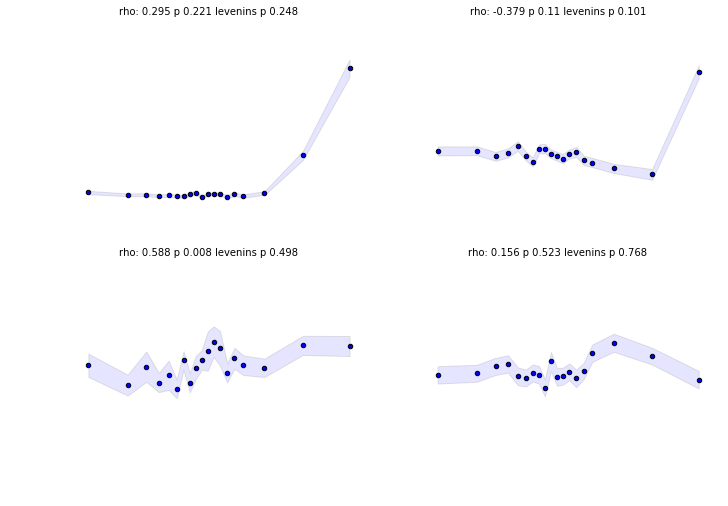

spontaneous


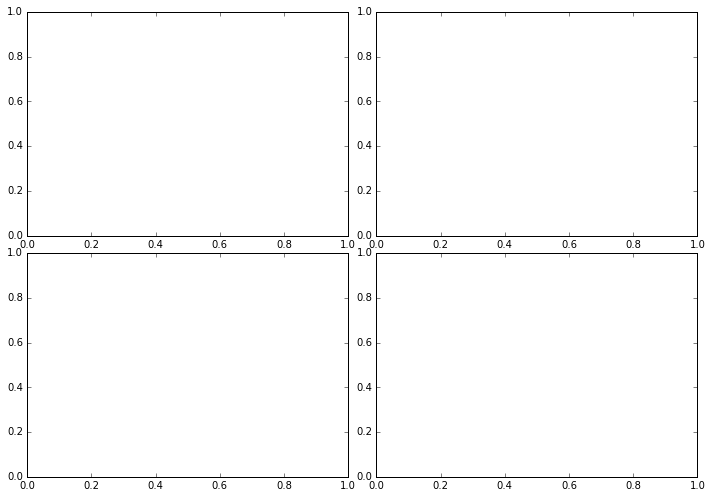

natural


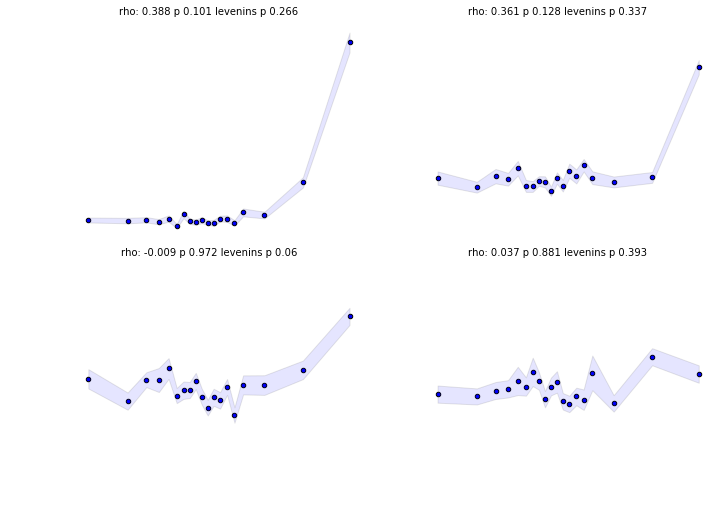

synthetic


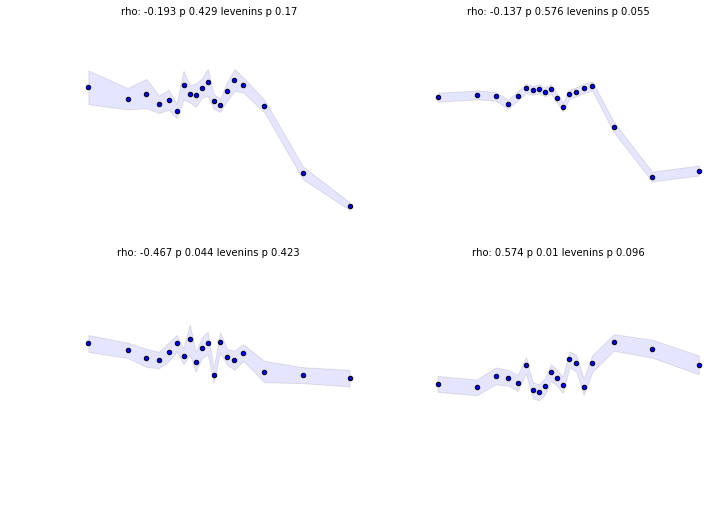

spontaneous


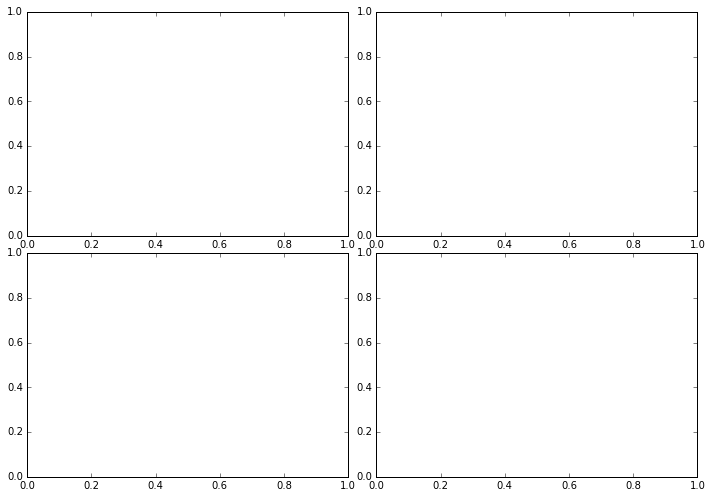

natural


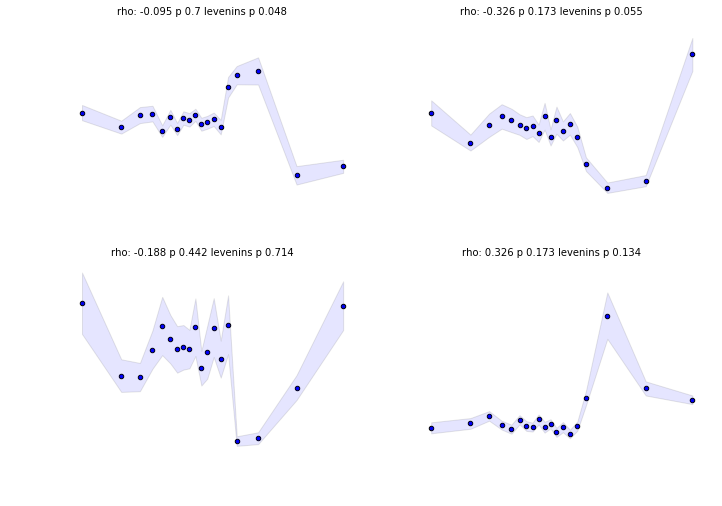

synthetic


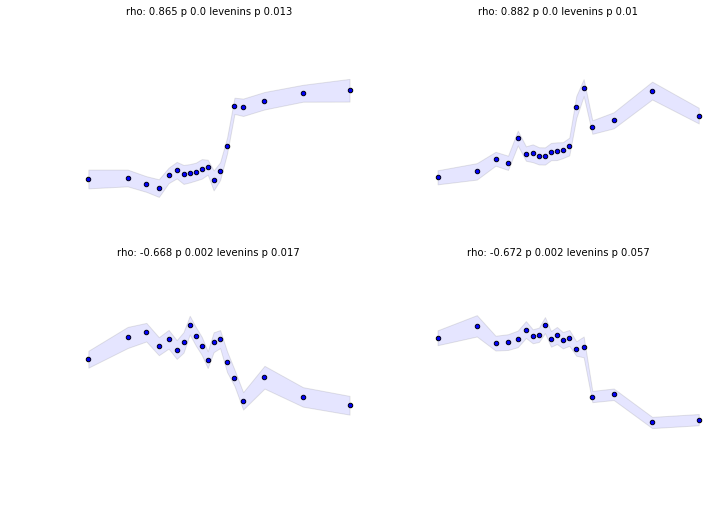

spontaneous


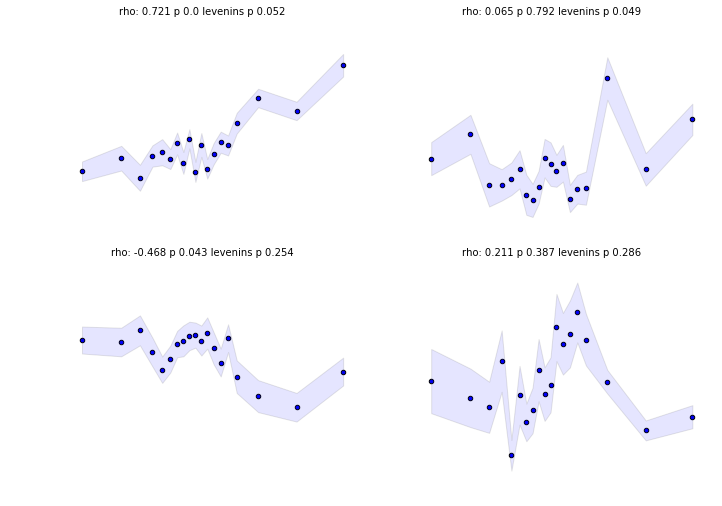

natural


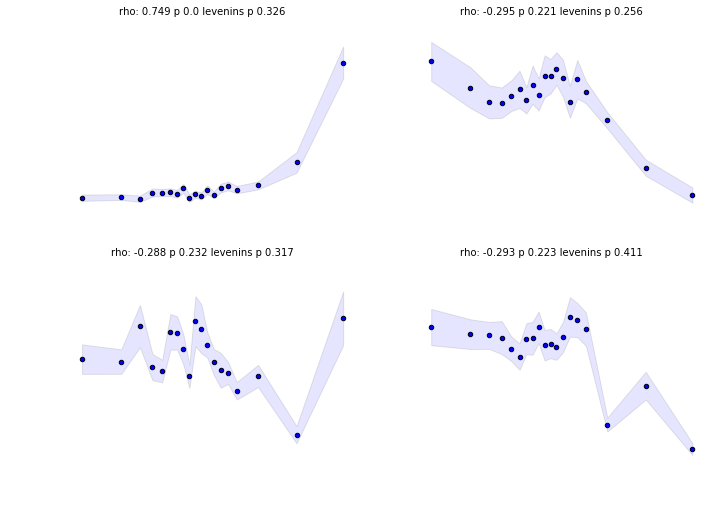

synthetic


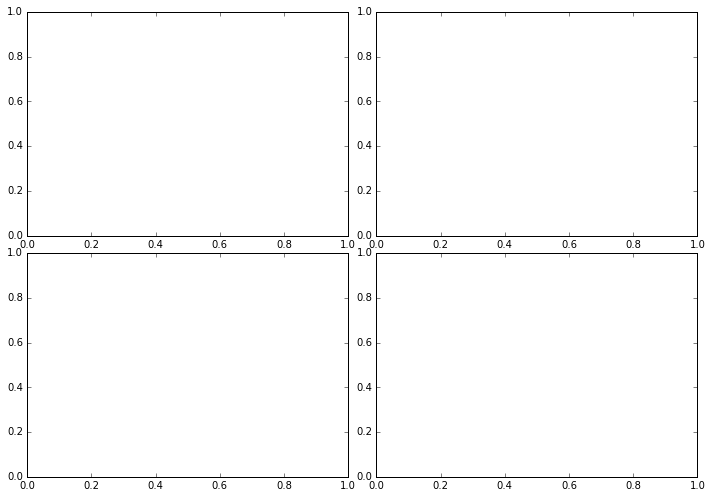

spontaneous


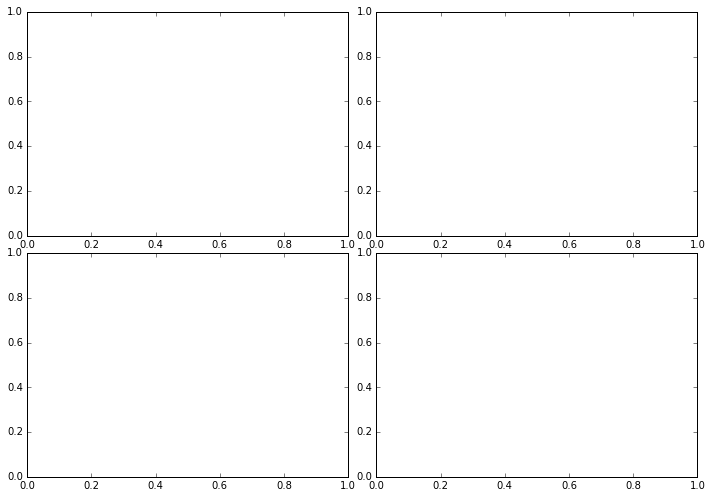

natural


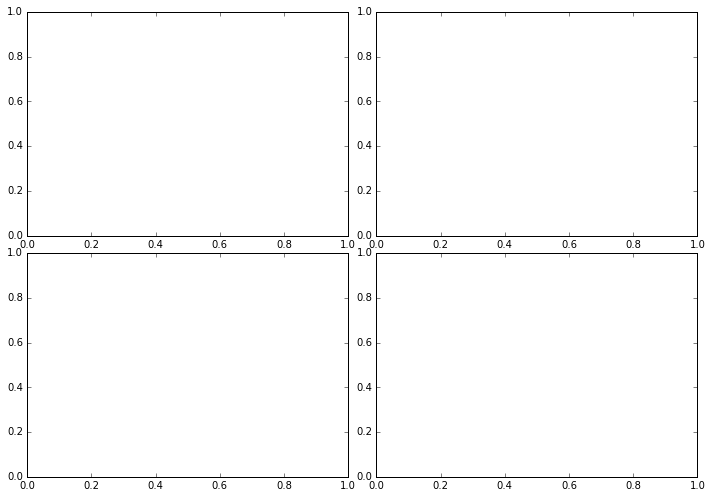

synthetic


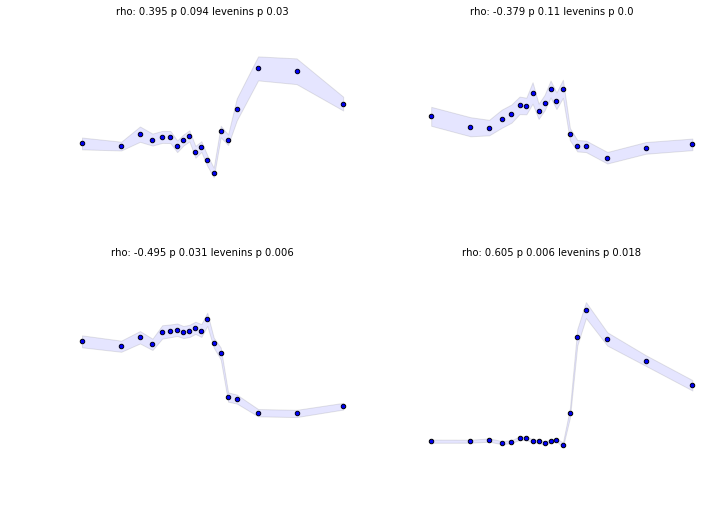

spontaneous


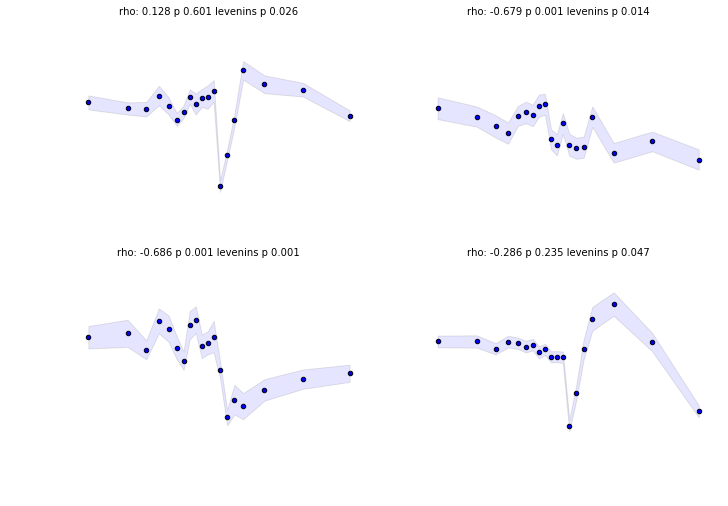

natural


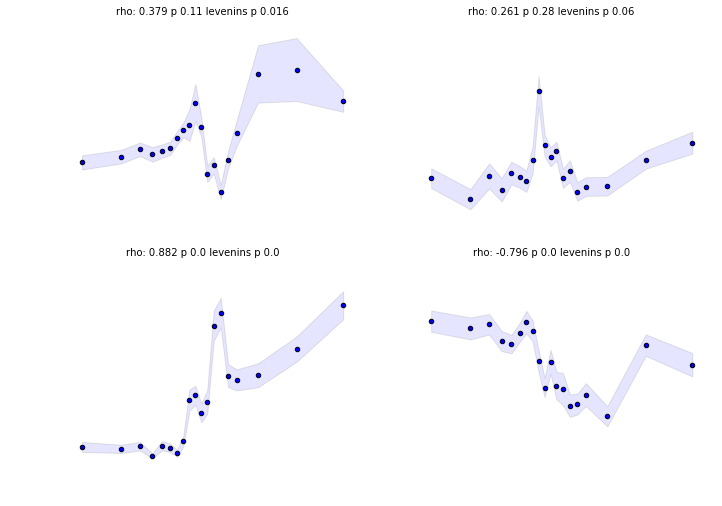

synthetic


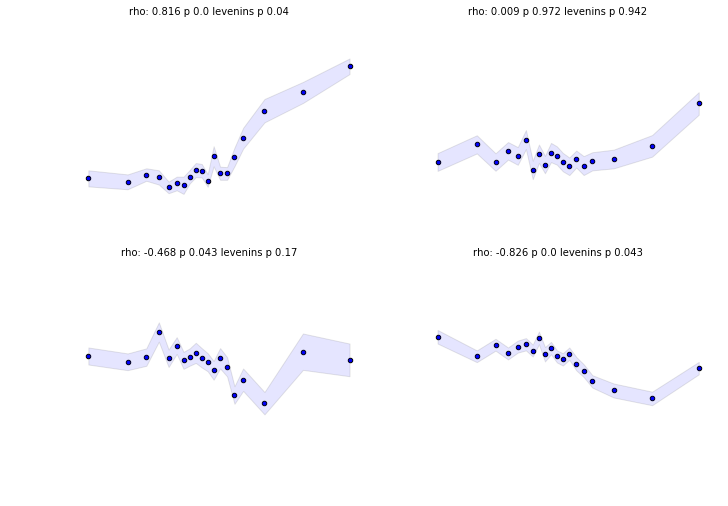

spontaneous


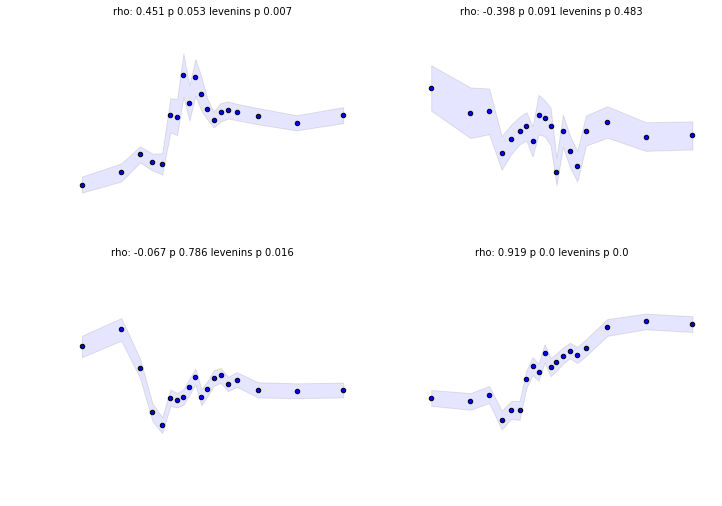

natural


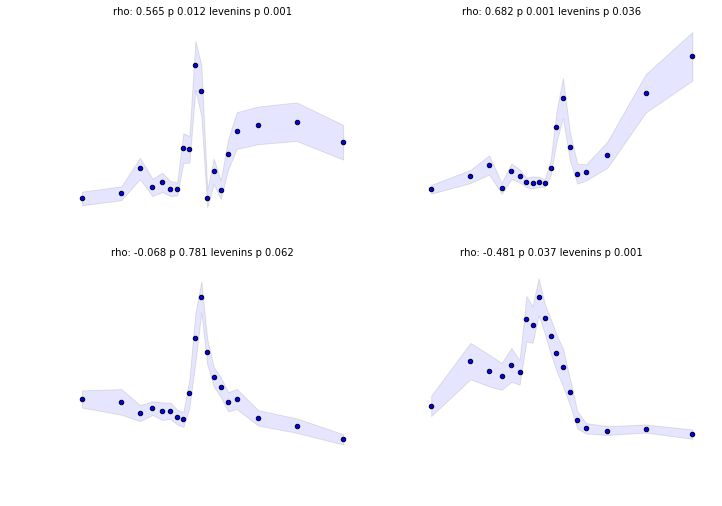

synthetic


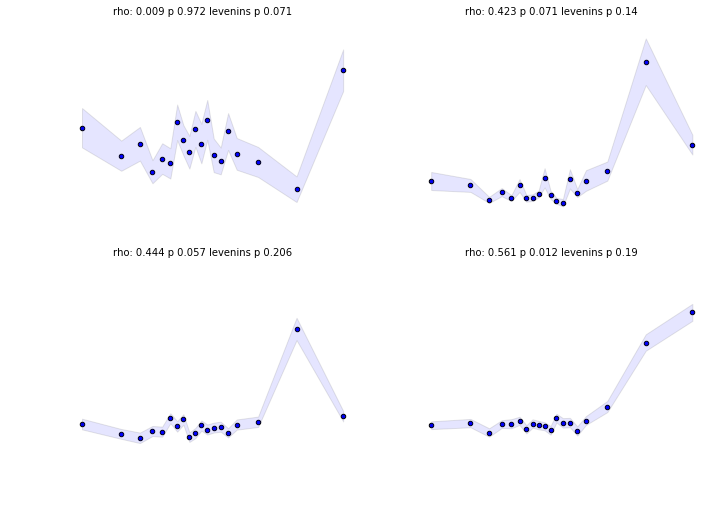

spontaneous


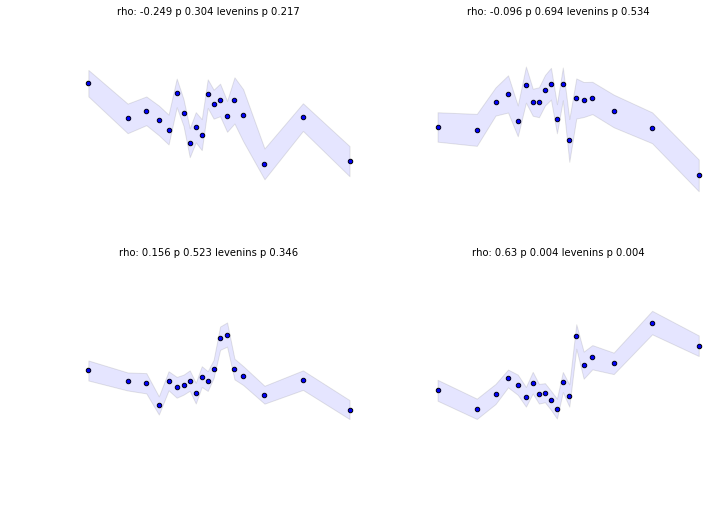

natural


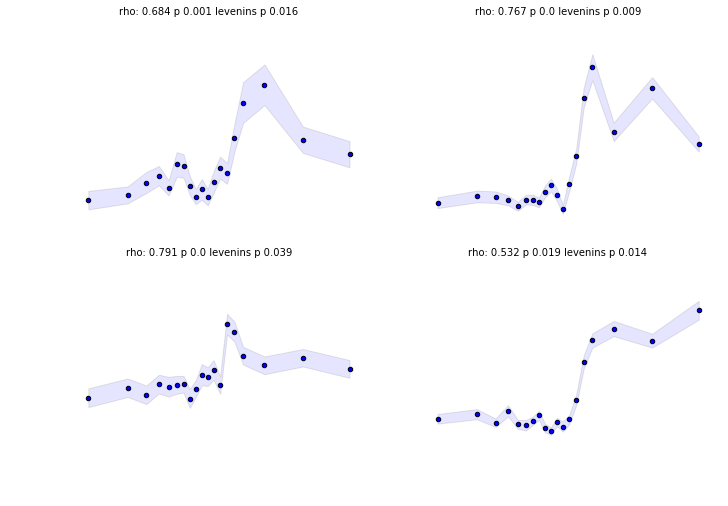

In [680]:

for ds in rs_results.keys():
    stim_results = rs_results[ds]  
    
    
    for stimulus in stim_results.keys():
       
        print stimulus
    
        neural_responses, results = stim_results[stimulus]
        
        num_rows, num_cols = 2, 2
        fig = plt.figure(figsize=(10,7))
        gs = gridspec.GridSpec(num_rows, num_cols, wspace=0.0)

        ax = [plt.subplot(gs[i]) for i in range(num_rows*num_cols)]
        gs.update(hspace=0)
        gs.tight_layout(fig, h_pad=0,w_pad=0)
        
        for i, k in enumerate(results.keys()):
            
            rho, p, p_value = results[k]

            ax[i].scatter(x, neural_responses[k][:, 0])
            ax[i].fill_between(x, neural_responses[k][:, 0] - neural_responses[k][:, 1],neural_responses[k][:, 0] + neural_responses[k][:, 1], alpha = .1)
            ax[i].axis('off')
            ax[i].set_title('rho: '+ str(round(rho, 3)) + ' p ' + str(round(p, 3)) + ' levenins p ' + str(round(p_value, 3)), fontsize = 10)


            #ax[i].plot(x, caran_curve(x,*copt_inc), c = 'r', label = "high pass")
            #ax[i].plot(x, caran_curve(x,*copt_dec), c = 'g', label = "low pass")
            #ax[i].plot(x, caran_curve(x,*copt_band), c = 'm', label = "bandpass")
            #ax[i].legend()

            #simpleaxis(ax[i])
  
            if i == (num_rows*num_cols - 1):
                break
       
        plt.show()